# **Aspiring Minds Computer Adaptive Test(AMCAT)** Data Analysis
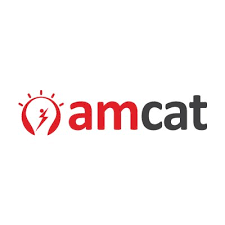

**AIM:** The aim of this analysis is to perform Exploratory Data Analysis (EDA) on the Aspiring Minds Employment Outcome 2015 (AMEO) dataset, focusing on understanding the employment outcomes of engineering graduates. The objective is to explore relationships between various cognitive, technical, and personality skills and employment variables, with a particular emphasis on salary prediction and identifying key influencing factors.

**DOMAIN:** Data Science

### **About the Dataset**

The dataset, released by Aspiring Minds from the Aspiring Minds Employment Outcome 2015 (AMEO) study, contains employment outcomes of engineering graduates. It includes around 4,000 data points and 40 independent variables that cover demographic details, academic performance, standardized test scores (cognitive, technical, and personality skills), and employment outcomes like salary, job titles, and job locations. The variables are a mix of continuous and categorical data, with key features such as candidate ID, salary, gender, academic scores, and AMCAT scores in various sections like English, Logical, Quant, and domain-specific tests. The dataset also tracks information on candidates' college and job-related details like city, state, and specialization.

### Import the Modules

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Data OverView

In [57]:
df=pd.read_csv('/kaggle/input/amcat-sheet/data.xlsx - Sheet1.csv')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [58]:
print("Shape of our dataset : ",df.shape)

Shape of our dataset :  (3998, 39)


In [59]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [60]:
df.dtypes

Unnamed: 0                object
ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
Mechanical

**Observation:** We observe that datatypes of columns like **DOB, DOJ** must be changed to **DateTime** format. Also lets change the **Gender** datavalues to ***Male and Female*** instead of **'m' and 'f'**.

In [61]:
df['DOJ'].head()

0    6/1/12 0:00
1    9/1/13 0:00
2    6/1/14 0:00
3    7/1/11 0:00
4    3/1/14 0:00
Name: DOJ, dtype: object

In [62]:
df['DOJ']=pd.to_datetime(df['DOJ'])
print(df['DOJ'].dtype)
df['DOJ'].head()

datetime64[ns]


0   2012-06-01
1   2013-09-01
2   2014-06-01
3   2011-07-01
4   2014-03-01
Name: DOJ, dtype: datetime64[ns]

In [63]:
df['DOB'].head()

0    2/19/90 0:00
1    10/4/89 0:00
2     8/3/92 0:00
3    12/5/89 0:00
4    2/27/91 0:00
Name: DOB, dtype: object

In [64]:
df['DOB']=pd.to_datetime(df['DOB'])
print(df['DOB'].dtype)
df['DOB'].head()

datetime64[ns]


0   1990-02-19
1   1989-10-04
2   1992-08-03
3   1989-12-05
4   1991-02-27
Name: DOB, dtype: datetime64[ns]

In [65]:
df.dtypes

Unnamed: 0                       object
ID                                int64
Salary                          float64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


In [66]:
df['Gender']

0       f
1       m
2       f
3       m
4       m
       ..
3993    m
3994    f
3995    m
3996    f
3997    f
Name: Gender, Length: 3998, dtype: object

In [67]:
df.Gender=df.Gender.map({'m':'Male','f':'Female'})
df['Gender']

0       Female
1         Male
2       Female
3         Male
4         Male
         ...  
3993      Male
3994    Female
3995      Male
3996    Female
3997    Female
Name: Gender, Length: 3998, dtype: object

In [68]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,2012-06-01,present,senior quality engineer,Bangalore,Female,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,2013-09-01,present,assistant manager,Indore,Male,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,2014-06-01,present,systems engineer,Chennai,Female,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,2011-07-01,present,senior software engineer,Gurgaon,Male,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,2014-03-01,3/1/15 0:00,get,Manesar,Male,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [15]:
df.isna().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [16]:
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   float64       
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [18]:
df.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


### Categorical Columns

In [19]:
categorical_cols=df.select_dtypes(include='object').columns
categorical_cols

Index(['Unnamed: 0', 'DOL', 'Designation', 'JobCity', 'Gender', '10board',
       '12board', 'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

### Nummerical Columns

In [20]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

### DateTime Columns

In [21]:
date_cols=df.select_dtypes(include='datetime64[ns]').columns
date_cols

Index(['DOJ', 'DOB'], dtype='object')

### Univariate Analysis (Numerical)

In [22]:
numerical_df=df[numerical_cols]
numerical_df

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,84.30,2007,95.80,1141,2,78.00,1141,0,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,85.40,2007,85.00,5807,2,70.06,5807,0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,85.00,2010,68.20,64,2,70.00,64,0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,85.60,2007,83.60,6920,1,74.64,6920,1,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,78.00,2008,76.80,11368,2,73.90,11368,0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,52.09,2006,55.50,6268,2,61.50,6268,0,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,90.00,2009,93.00,4883,2,77.30,4883,1,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,81.86,2008,65.50,9786,2,70.00,9786,0,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,78.72,2010,69.88,979,2,70.42,979,1,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


Statistics for column: Salary
Min: 35000.0
Max: 4000000.0
Mean: 307699.8499249625
Median: 300000.0
Skewness: 6.44866054831297
Kurtosis: 80.82731823061802


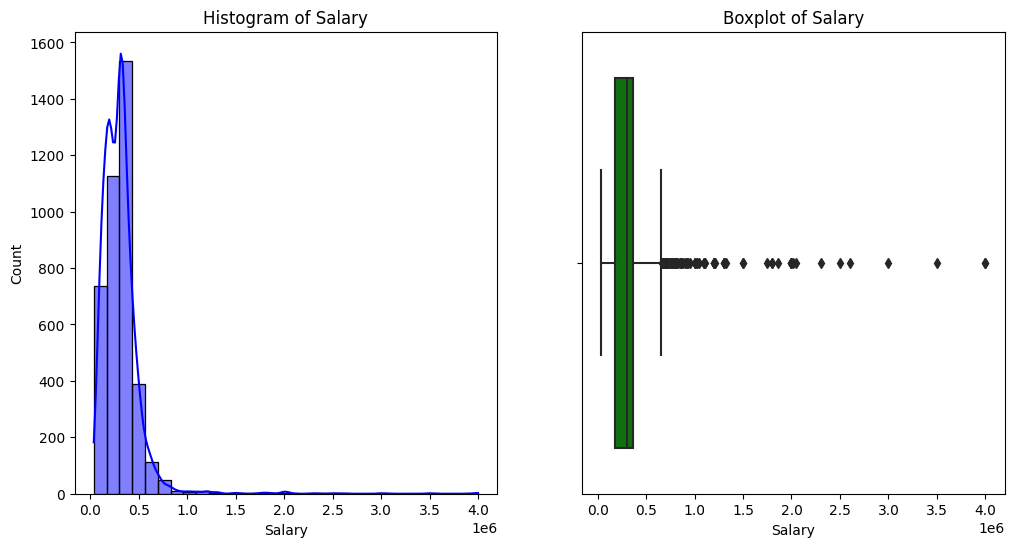

Statistics for column: 10percentage
Min: 43.0
Max: 97.76
Mean: 77.9254427213607
Median: 79.15
Skewness: -0.5907967422390255
Kurtosis: -0.11164680905297963


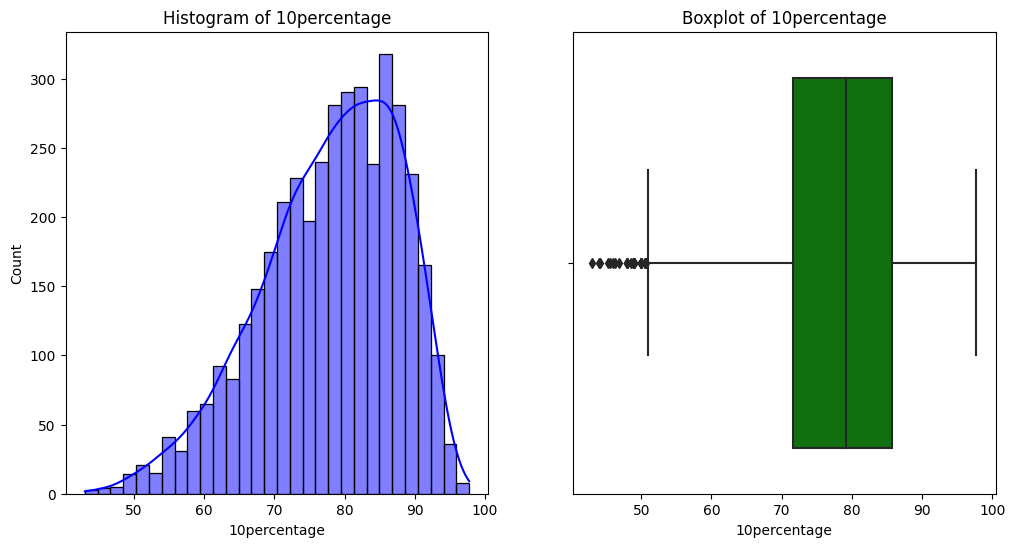

Statistics for column: 12percentage
Min: 40.0
Max: 98.7
Mean: 74.46636568284141
Median: 74.4
Skewness: -0.032595179202258136
Kurtosis: -0.6314493016154126


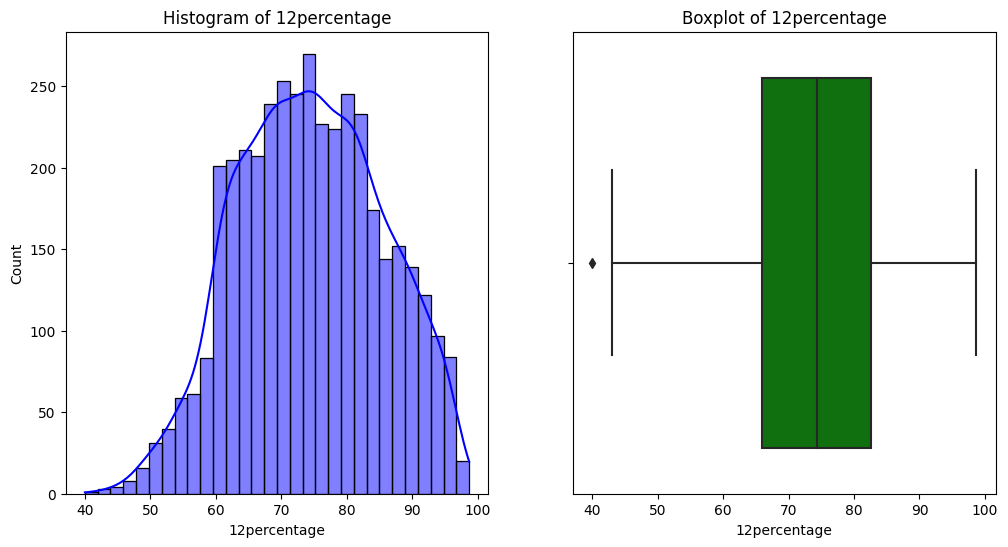

Statistics for column: collegeGPA
Min: 6.45
Max: 99.93
Mean: 71.48617058529265
Median: 71.72
Skewness: -1.2487404274031384
Kurtosis: 10.21994936069596


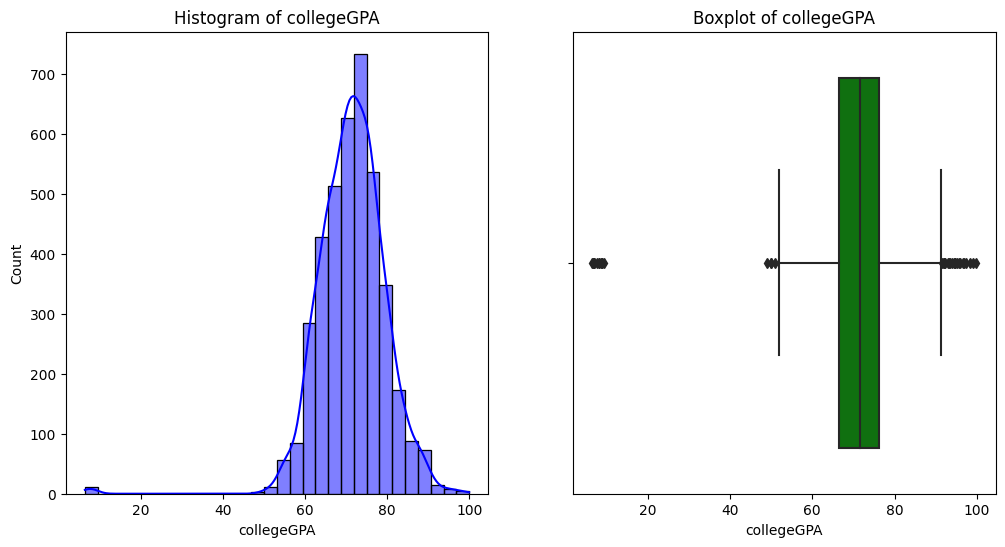

Statistics for column: English
Min: 180
Max: 875
Mean: 501.64907453726863
Median: 500.0
Skewness: 0.1919249750111508
Kurtosis: -0.2553151870949164


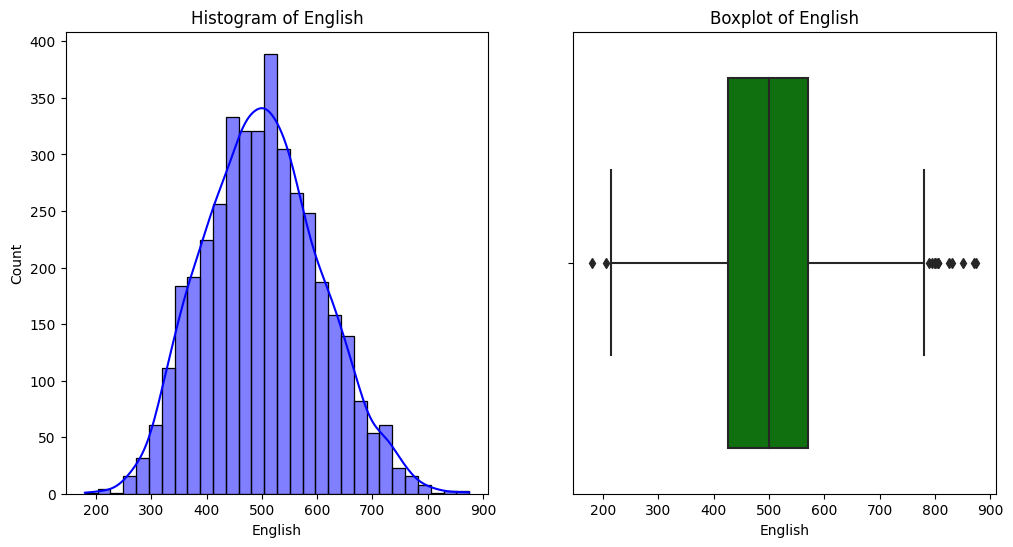

Statistics for column: Logical
Min: 195
Max: 795
Mean: 501.59879939969983
Median: 505.0
Skewness: -0.21652053612984407
Kurtosis: -0.22597989963617682


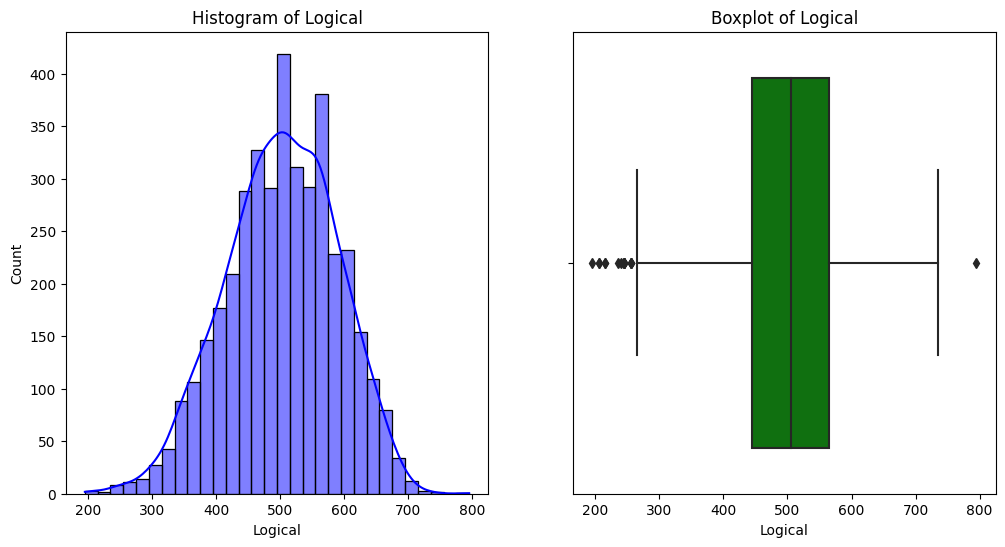

Statistics for column: Quant
Min: 120
Max: 900
Mean: 513.3781890945472
Median: 515.0
Skewness: -0.019391755556999294
Kurtosis: -0.10384434185307434


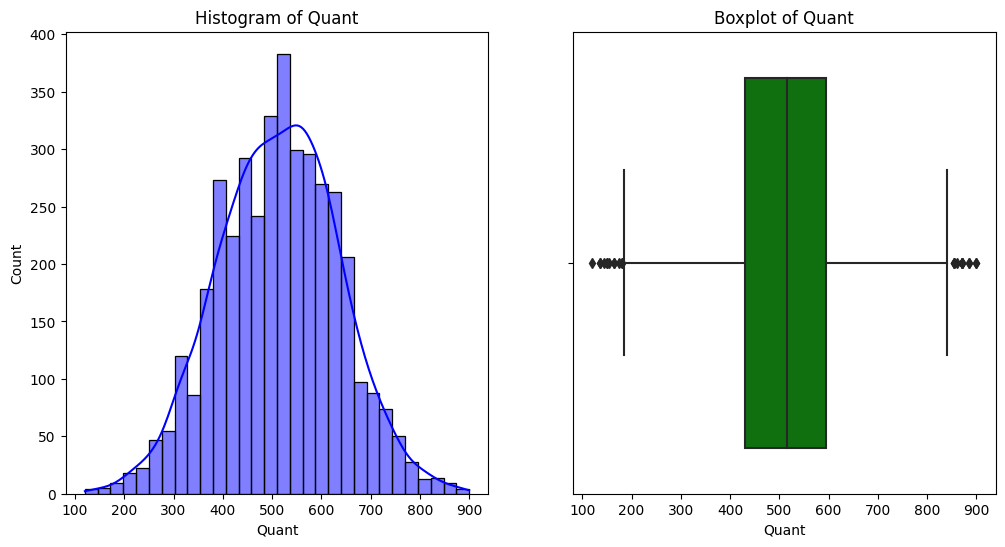

Statistics for column: ComputerProgramming
Min: -1
Max: 840
Mean: 353.10280140070034
Median: 415.0
Skewness: -0.7778136825484333
Kurtosis: -0.6670191448718974


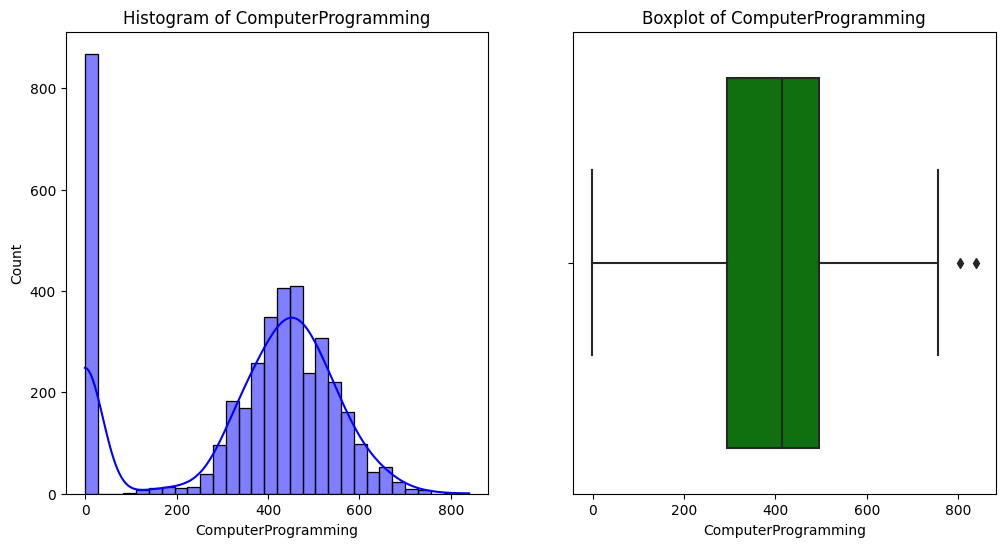

Statistics for column: ElectronicsAndSemicon
Min: -1
Max: 612
Mean: 95.32841420710355
Median: -1.0
Skewness: 1.1955261109357744
Kurtosis: -0.21161173593544147


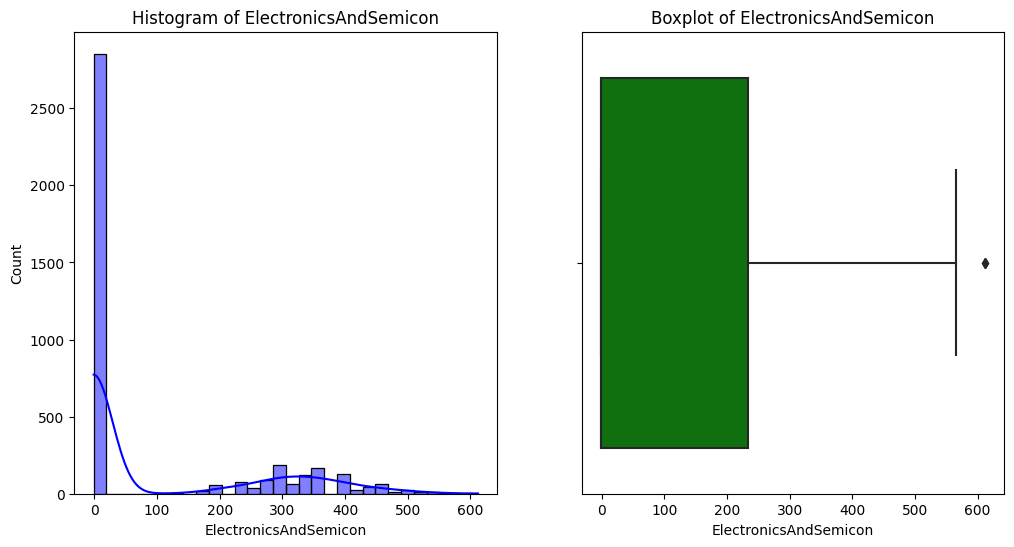

Statistics for column: ComputerScience
Min: -1
Max: 715
Mean: 90.7423711855928
Median: -1.0
Skewness: 1.5289469492574301
Kurtosis: 0.6902745985889482


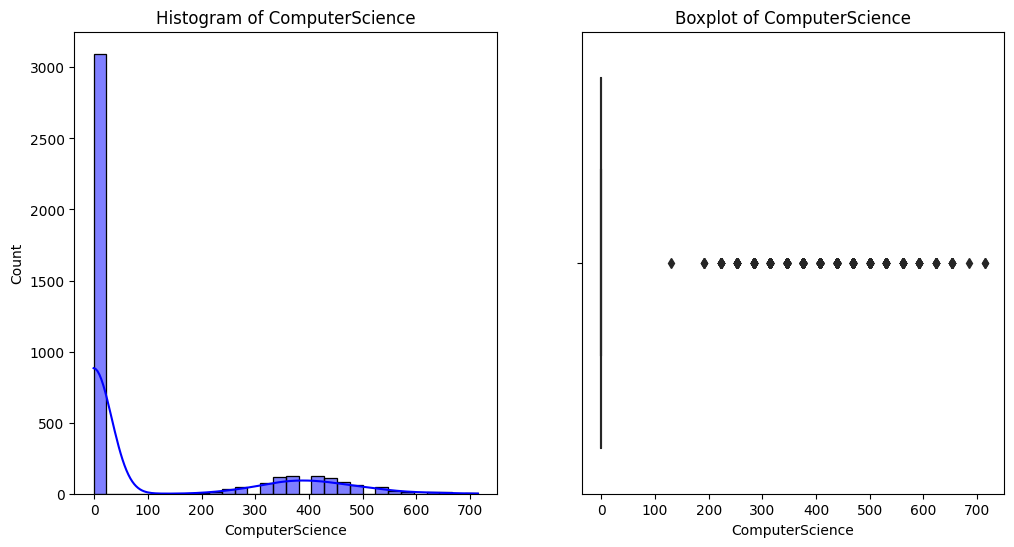

Statistics for column: MechanicalEngg
Min: -1
Max: 623
Mean: 22.97473736868434
Median: -1.0
Skewness: 4.0280514405380154
Kurtosis: 14.998679886132297


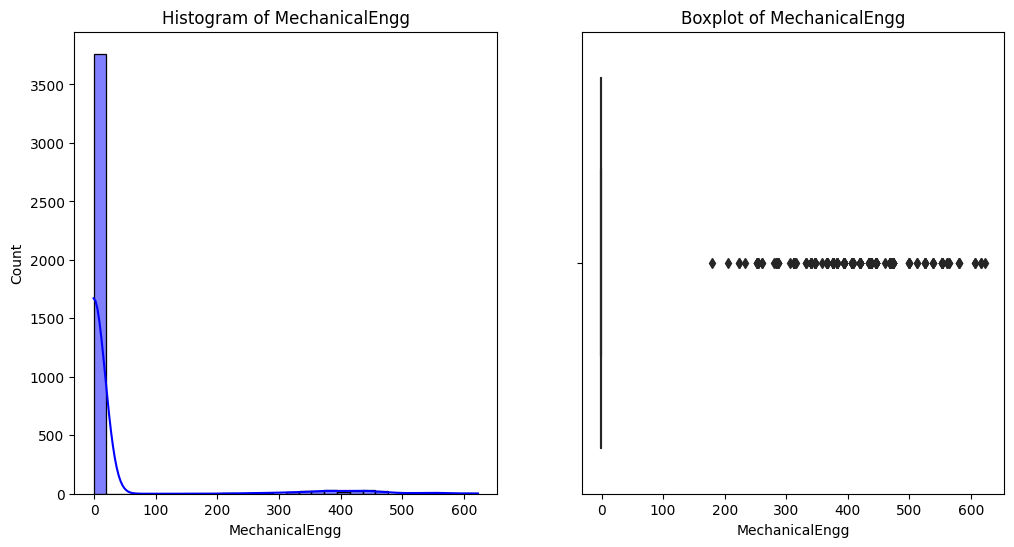

Statistics for column: ElectricalEngg
Min: -1
Max: 676
Mean: 16.478739369684842
Median: -1.0
Skewness: 5.058508440756092
Kurtosis: 24.845590955541997


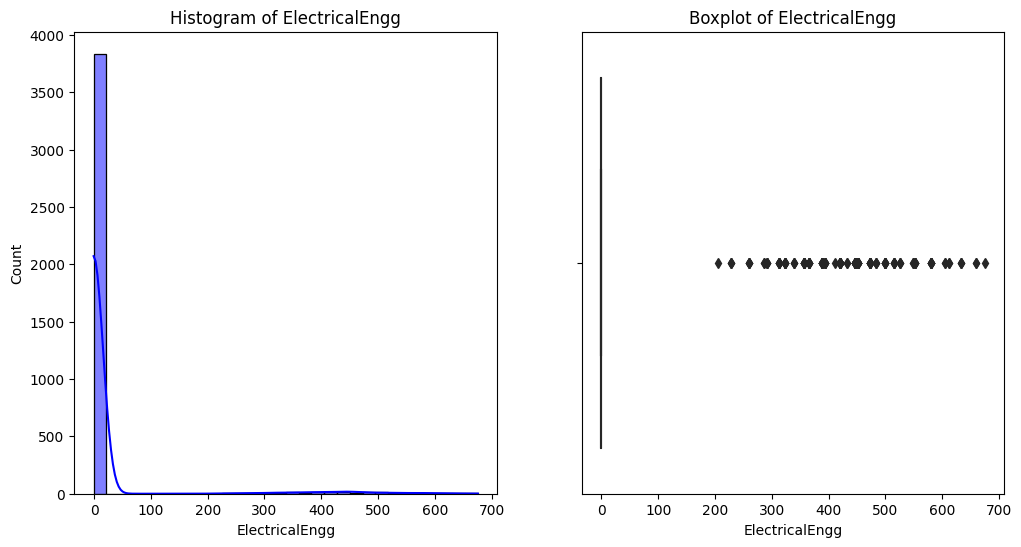

Statistics for column: TelecomEngg
Min: -1
Max: 548
Mean: 31.851175587793897
Median: -1.0
Skewness: 3.040119450810971
Kurtosis: 7.798956685776439


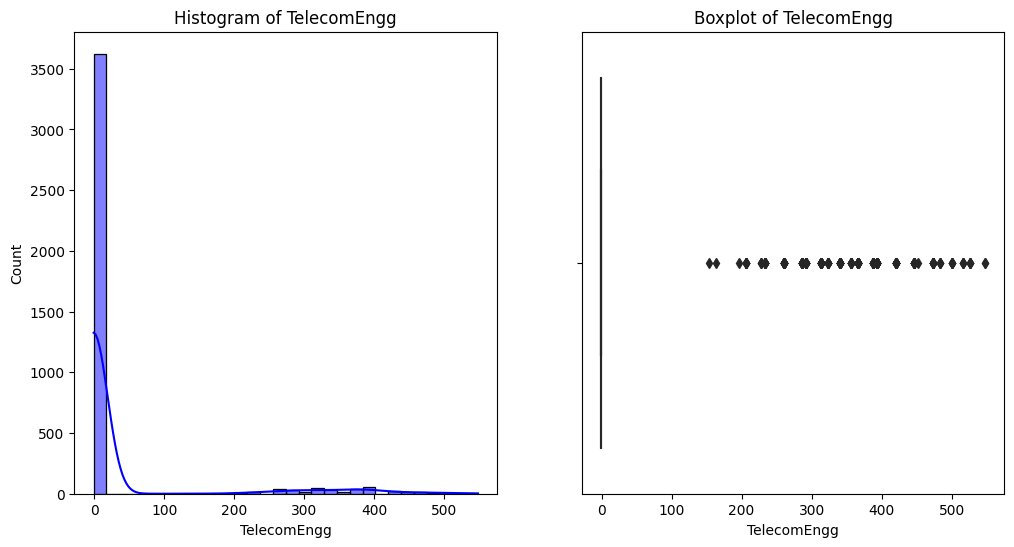

Statistics for column: CivilEngg
Min: -1
Max: 516
Mean: 2.68384192096048
Median: -1.0
Skewness: 10.311810510449162
Kurtosis: 108.90352629121763


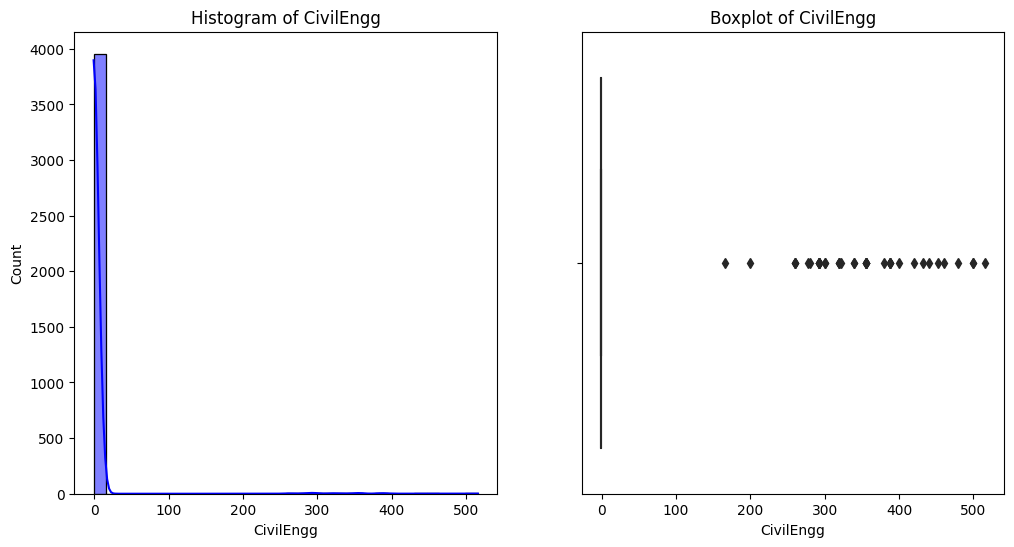

Statistics for column: conscientiousness
Min: -4.1267
Max: 1.9953
Mean: -0.03783129064532267
Median: 0.0464
Skewness: -0.5268055945864971
Kurtosis: 0.12094197654529593


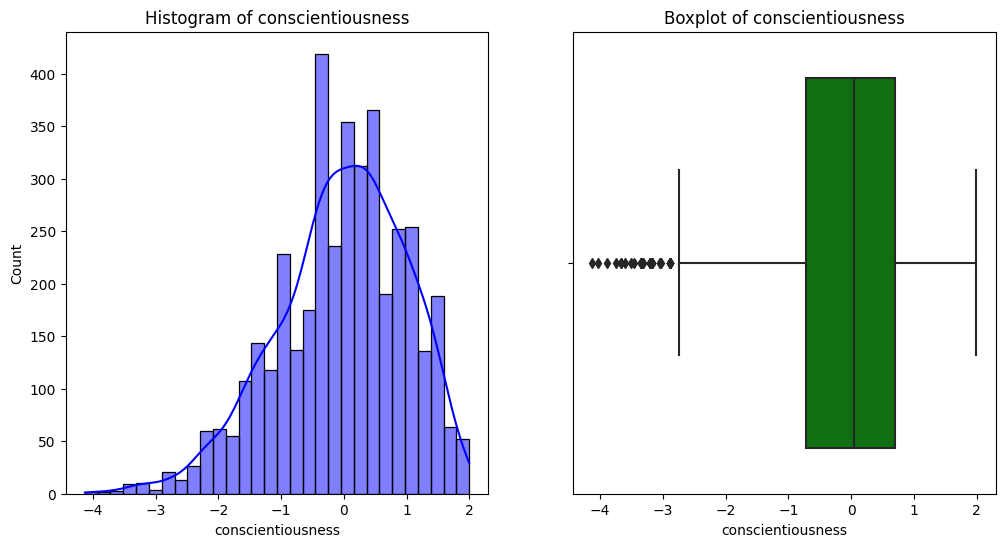

Statistics for column: agreeableness
Min: -5.7816
Max: 1.9048
Mean: 0.14649582291145571
Median: 0.2124
Skewness: -1.2044631329796518
Kurtosis: 3.385502238121073


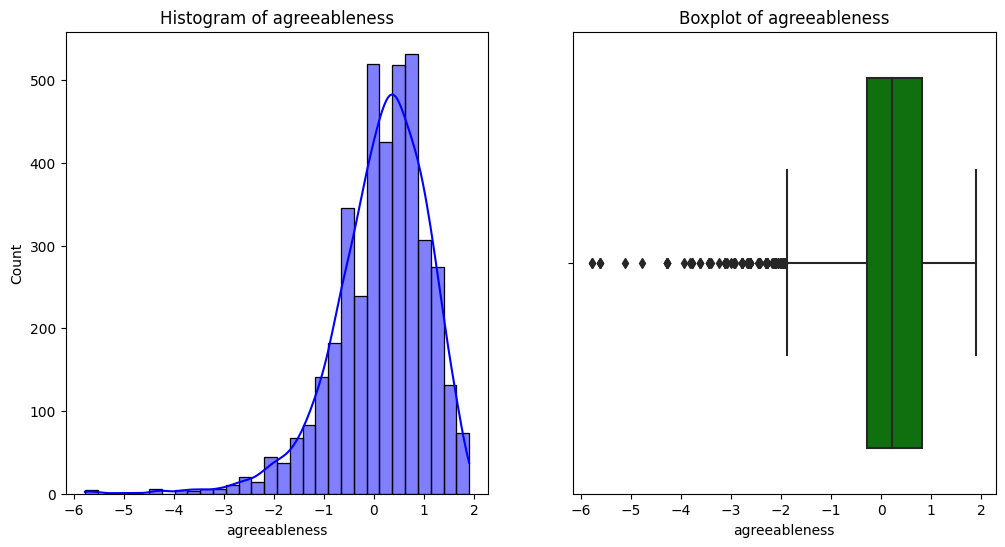

Statistics for column: extraversion
Min: -4.6009
Max: 2.5354
Mean: 0.0027629814907453795
Median: 0.0914
Skewness: -0.5230704373682461
Kurtosis: 0.6416632674320177


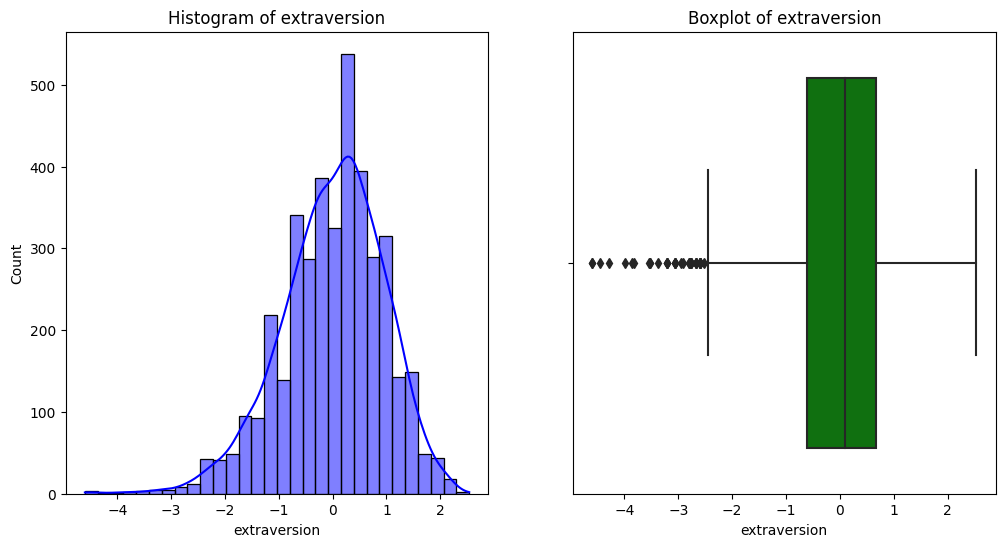

Statistics for column: nueroticism
Min: -2.643
Max: 3.3525
Mean: -0.16903257128564284
Median: -0.2344
Skewness: 0.16564750621703866
Kurtosis: -0.19279971750140756


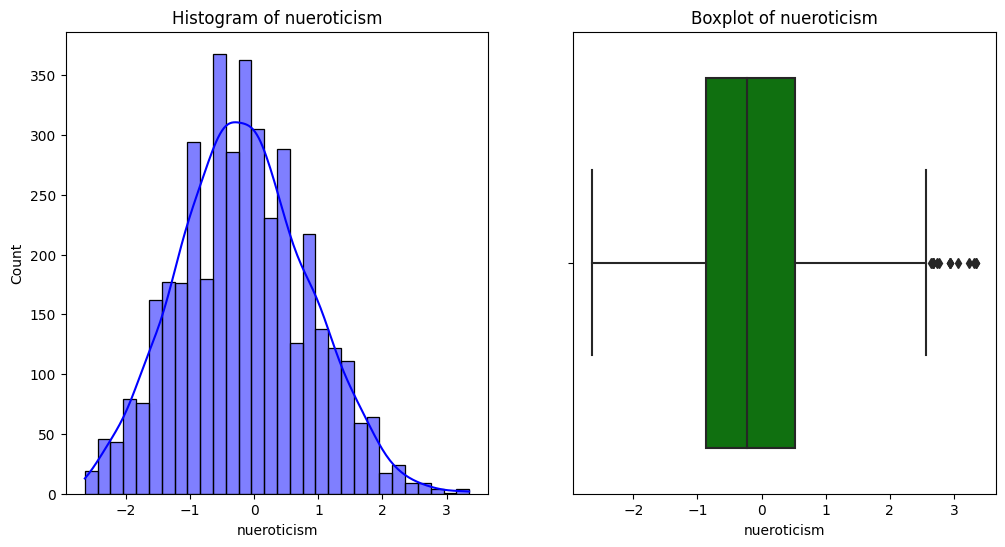

Statistics for column: openess_to_experience
Min: -7.3757
Max: 1.8224
Mean: -0.13811023011505755
Median: -0.0943
Skewness: -1.5063965613424706
Kurtosis: 5.779590372046927


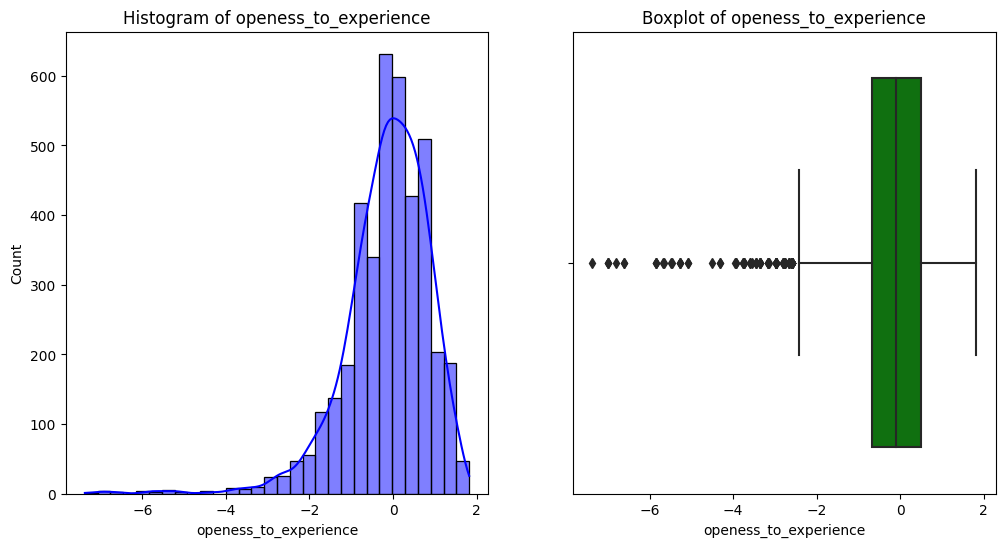

In [23]:
from scipy.stats import skew, kurtosis

def numerical_univariate(data, column_name):
    
    # Basic Statistics
    col_data = data[column_name].dropna()
    min_val = col_data.min()
    max_val = col_data.max()
    mean_val = col_data.mean()
    median_val = col_data.median()
    skew_val = skew(col_data)
    kurt_val = kurtosis(col_data)

    # Print basic statistics
    print(f"Statistics for column: {column_name}")
    print(f"Min: {min_val}")
    print(f"Max: {max_val}")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Skewness: {skew_val}")
    print(f"Kurtosis: {kurt_val}")
    
    # Plot Histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(col_data, kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {column_name}')

    # Plot Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col_data, color='green')
    plt.title(f'Boxplot of {column_name}')
    plt.show()

col = ['Salary','10percentage','12percentage','collegeGPA','English','Logical','Quant','ComputerProgramming','ElectronicsAndSemicon',
       'ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion',
       'nueroticism','openess_to_experience']
for i  in col:
    numerical_univariate(numerical_df, i)


Value Counts for column: 12graduation
12graduation
2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: count, dtype: int64


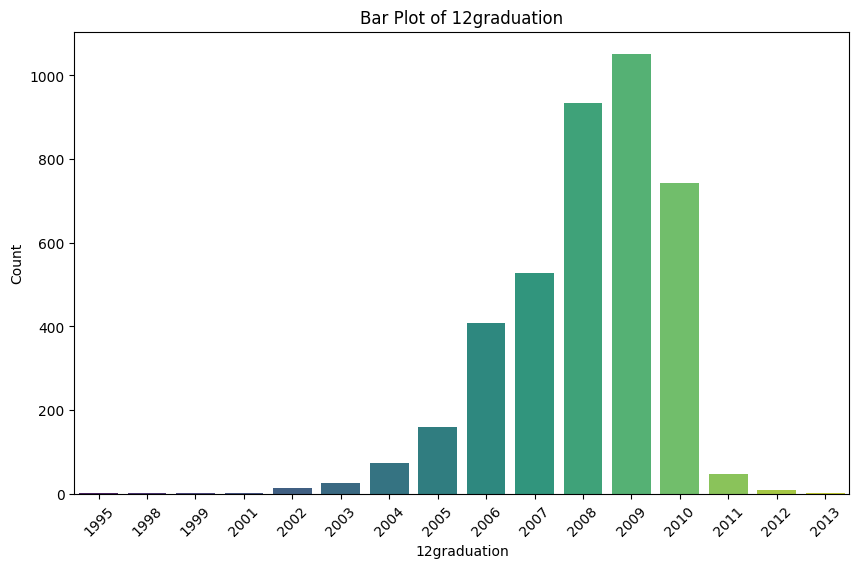

Value Counts for column: CollegeTier
CollegeTier
2    3701
1     297
Name: count, dtype: int64


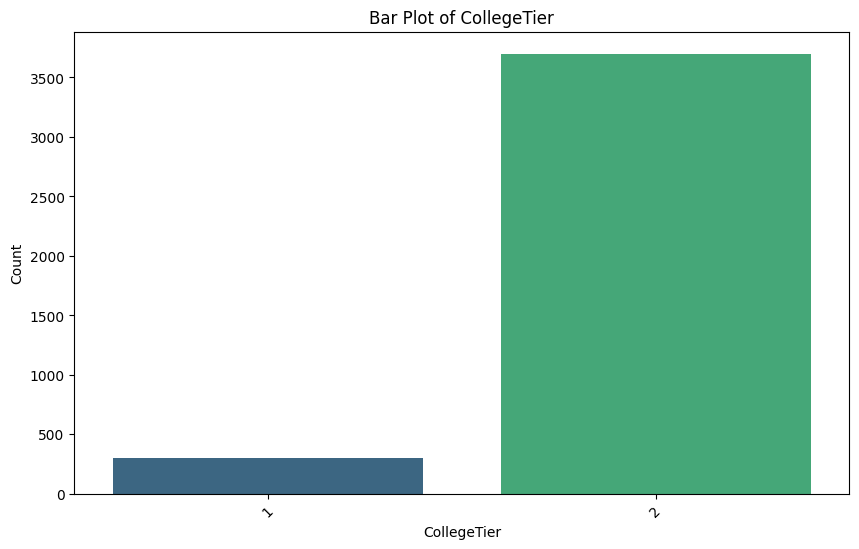

Value Counts for column: CollegeCityTier
CollegeCityTier
0    2797
1    1201
Name: count, dtype: int64


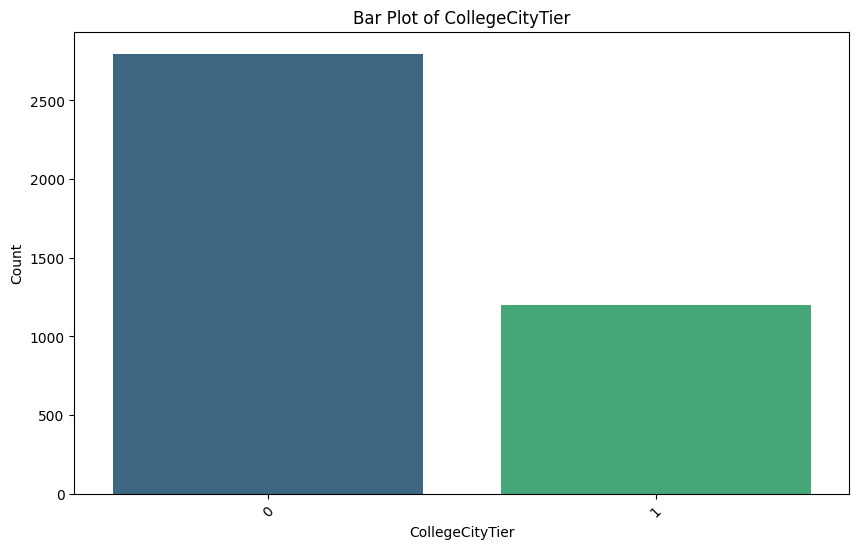

Value Counts for column: GraduationYear
GraduationYear
2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: count, dtype: int64


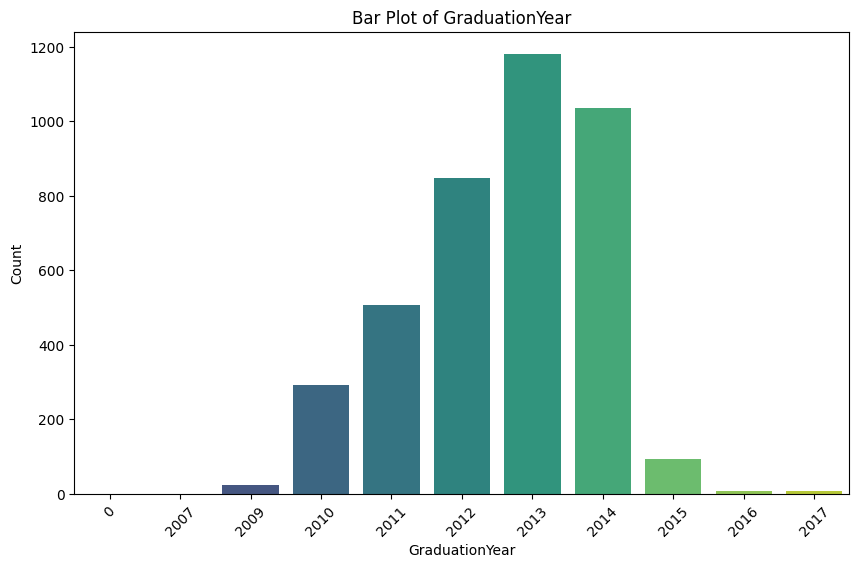

In [24]:
def numerical_univariate_categories(data, column_name):
    
    # Value counts for the column
    value_counts = data[column_name].value_counts()
    
    # Print value counts
    print(f"Value Counts for column: {column_name}")
    print(value_counts)
    
    # Plot Barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
    plt.title(f'Bar Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
col=['12graduation','CollegeTier','CollegeCityTier','GraduationYear']
for i in col:
    numerical_univariate_categories(numerical_df,i)

### Bivariate Analysis (Numerical)

In [25]:
numerical_df

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,84.30,2007,95.80,1141,2,78.00,1141,0,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,85.40,2007,85.00,5807,2,70.06,5807,0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,85.00,2010,68.20,64,2,70.00,64,0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,85.60,2007,83.60,6920,1,74.64,6920,1,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,78.00,2008,76.80,11368,2,73.90,11368,0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,52.09,2006,55.50,6268,2,61.50,6268,0,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,90.00,2009,93.00,4883,2,77.30,4883,1,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,81.86,2008,65.50,9786,2,70.00,9786,0,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,78.72,2010,69.88,979,2,70.42,979,1,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


###  10th Percentage / 12th Percentage vs Salary


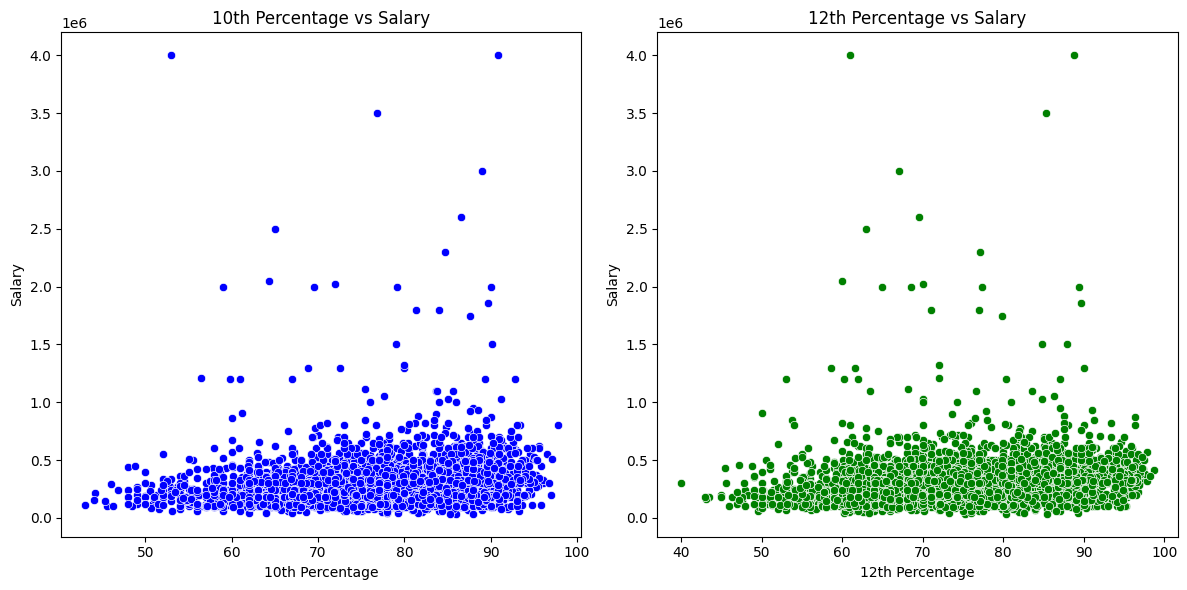

In [26]:
plt.figure(figsize=(12, 6))

# Scatter plot for 10th percentage vs Salary
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['10percentage'], y=df['Salary'], color='blue')
plt.title('10th Percentage vs Salary')
plt.xlabel('10th Percentage')
plt.ylabel('Salary')

# Scatter plot for 12th percentage vs Salary
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['12percentage'], y=df['Salary'], color='green')
plt.title('12th Percentage vs Salary')
plt.xlabel('12th Percentage')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()


**Observation:** The scatterplots show no clear correlation between 10th and 12th percentages and salary. Candidates across a wide range of academic scores generally fall within lower salary brackets, with a few high earners scattered throughout. This suggests that performance in **10th and 12th grade** has a **limited influence on salary outcomes.**

### College CGPA vs Salary

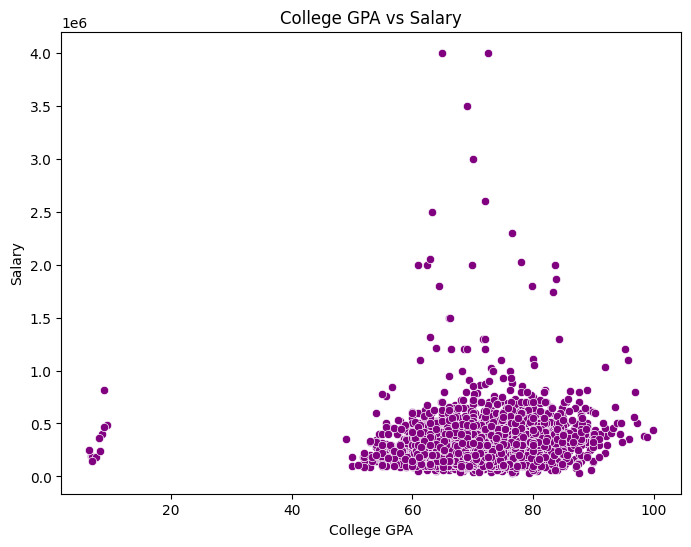

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['collegeGPA'], y=df['Salary'], color='purple')
plt.title('College GPA vs Salary')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()

**Observation:** The scatterplot shows that there is no strong linear relationship between college GPA and salary. Most candidates, regardless of their GPA, tend to cluster around lower salary ranges. However, there are a **few high earners with a GPA in the range of 60–80**, suggesting that while GPA might have **some influence**, it is **not a dominant factor** in determining salary.

### CollegeTier and CollegeCityTier vs Salary

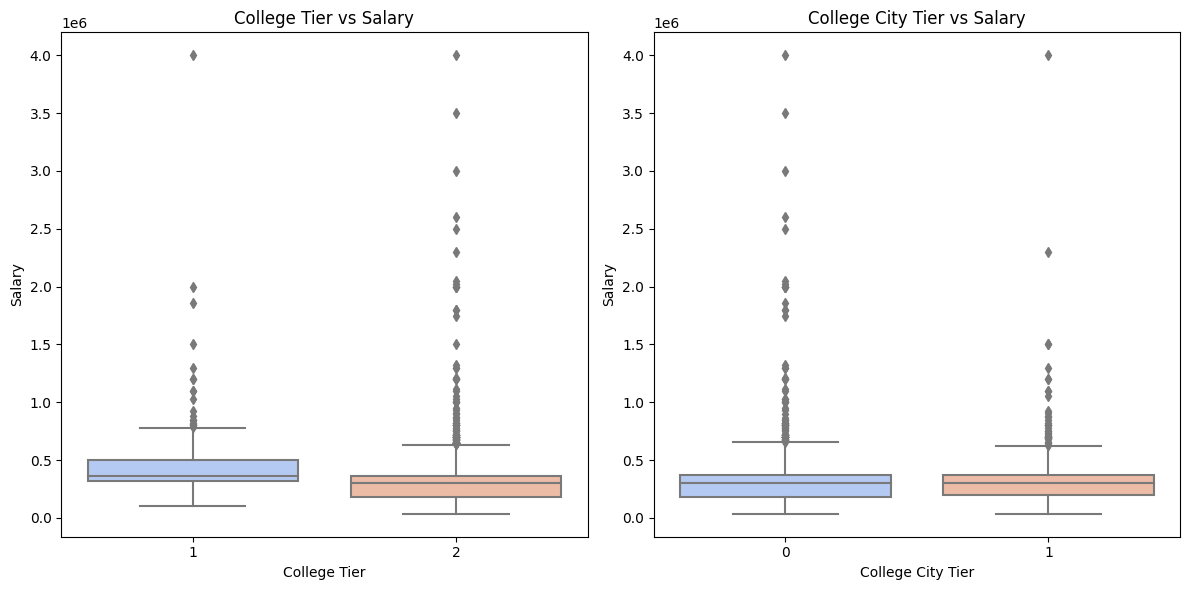

In [28]:
plt.figure(figsize=(12, 6))

# Boxplot for CollegeTier vs Salary
plt.subplot(1, 2, 1)
sns.boxplot(x=df['CollegeTier'], y=df['Salary'], palette='coolwarm')
plt.title('College Tier vs Salary')
plt.xlabel('College Tier')
plt.ylabel('Salary')

# Boxplot for CollegeCityTier vs Salary
plt.subplot(1, 2, 2)
sns.boxplot(x=df['CollegeCityTier'], y=df['Salary'], palette='coolwarm')
plt.title('College City Tier vs Salary')
plt.xlabel('College City Tier')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()


**Observation:** The boxplots show that there is little difference in salary distributions between College Tiers and College City Tiers. Both groups display **similar median salaries and spread**, with some high salary outliers in each category. This suggests that **neither college tier nor city tier** alone has a strong influence on salary outcomes.

### Subject-wise Analysis vs Salary

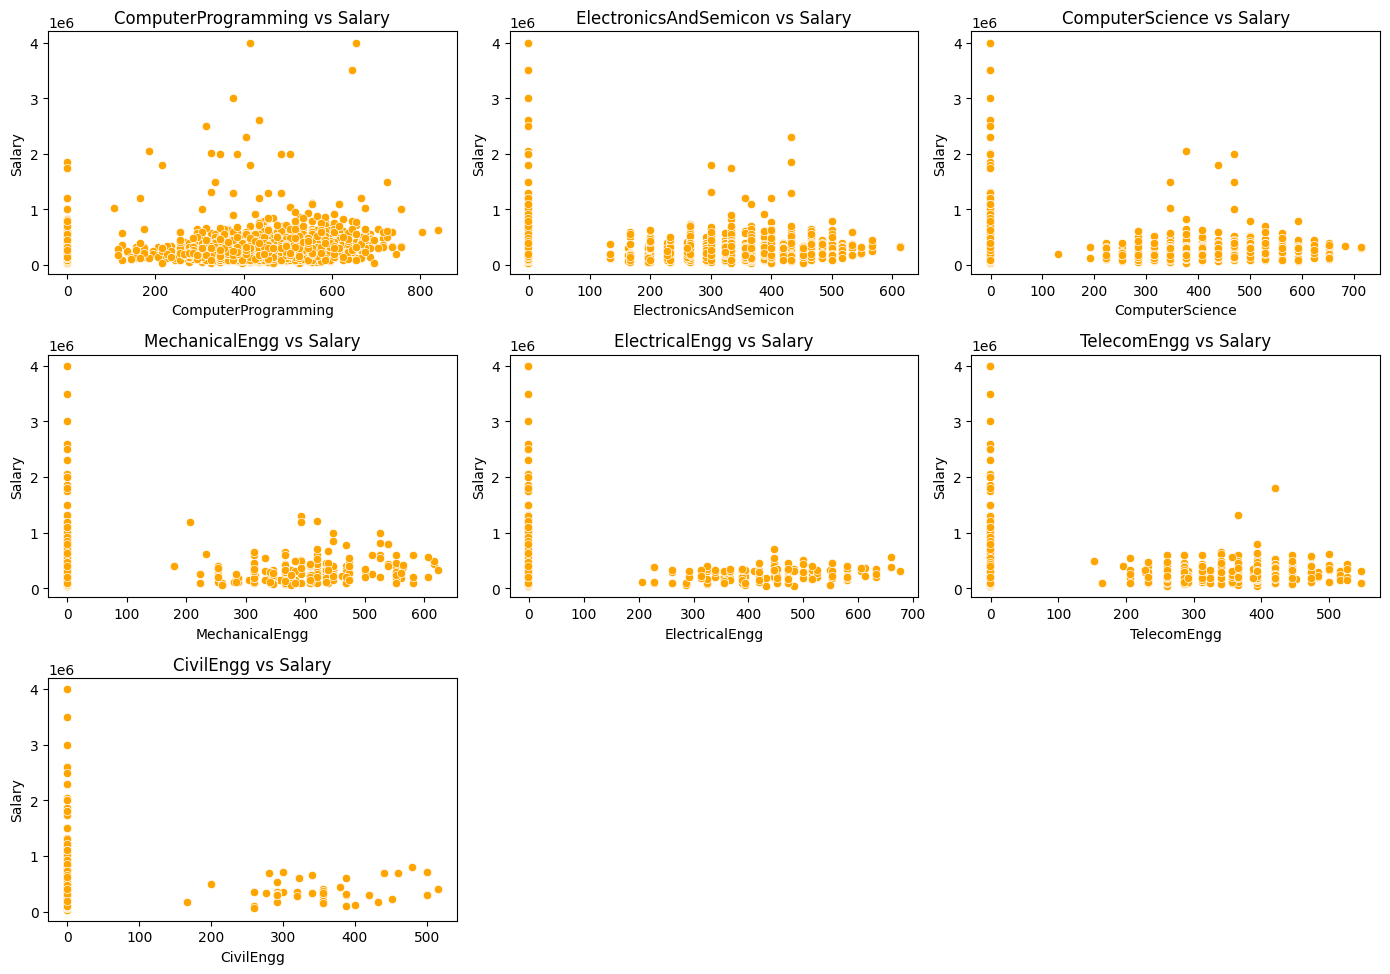

In [29]:
subjects = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
            'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

plt.figure(figsize=(14, 10))

for i, subject in enumerate(subjects, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[subject], y=df['Salary'], color='orange')
    plt.title(f'{subject} vs Salary')
    plt.xlabel(subject)
    plt.ylabel('Salary')

plt.tight_layout()
plt.show()

**Observation:** The scatterplots show **no clear linear relationship** between subject scores and salary. Most candidates cluster in lower salary ranges across all subjects, regardless of their proficiency scores. A few high earners exist across various score ranges, indicating that subject performance alone does **not strongly determine salary outcomes.**

### Personality traits vs Salary

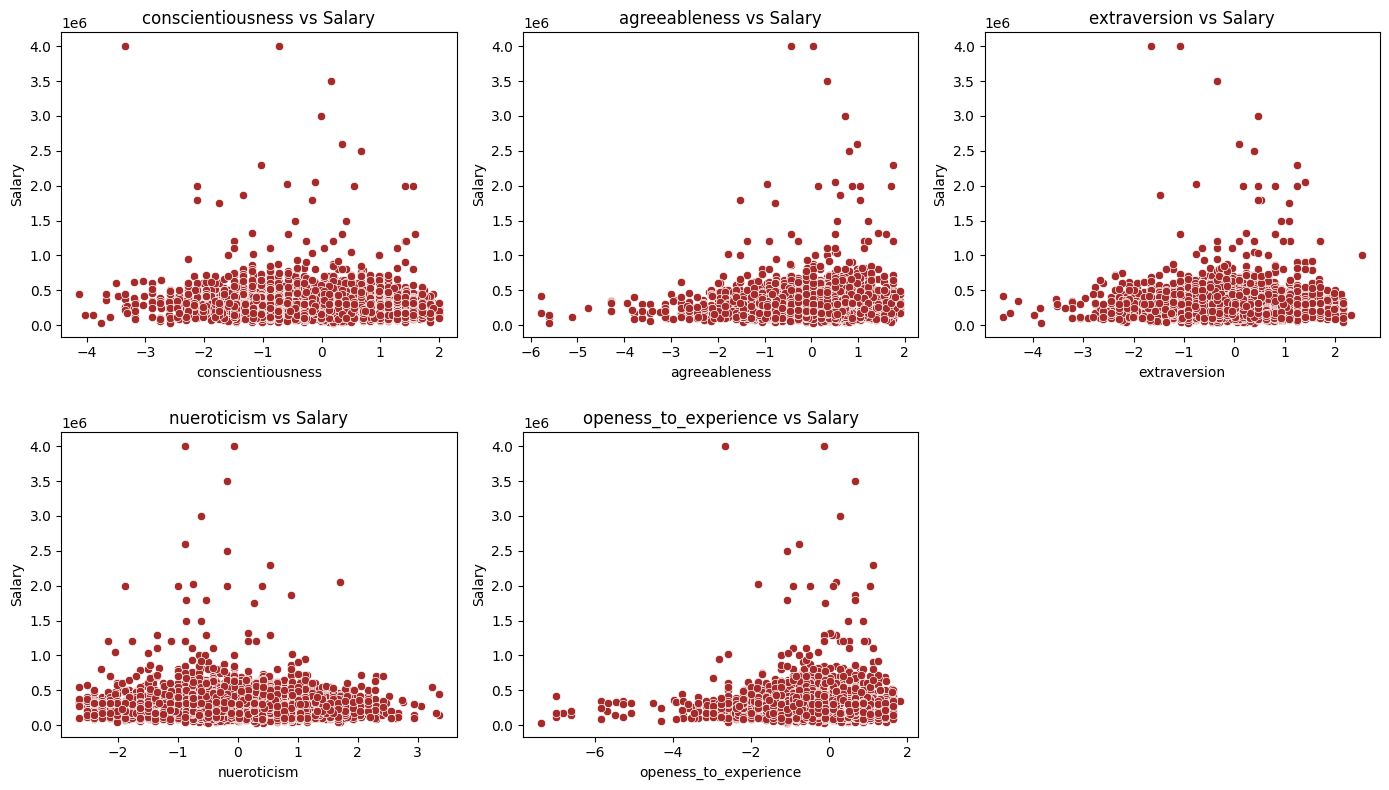

In [30]:
traits = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

plt.figure(figsize=(14, 8))

for i, trait in enumerate(traits, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[trait], y=df['Salary'], color='brown')
    plt.title(f'{trait} vs Salary')
    plt.xlabel(trait)
    plt.ylabel('Salary')

plt.tight_layout()
plt.show()


**Observation:** The scatterplots show **no strong correlation** with salary. Most candidates, regardless of their personality scores, cluster in lower salary ranges. However, there are a few high earners spread across various score ranges, suggesting that personality traits may have **limited influence** on salary outcomes.

### Scatter plot for Domain vs Salary

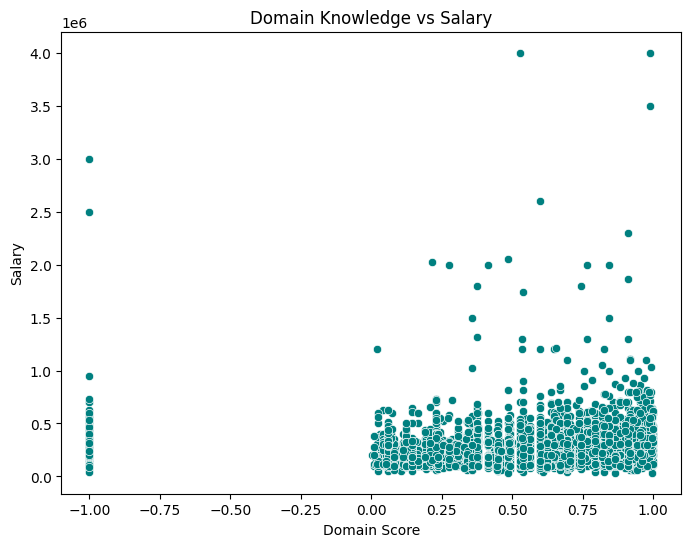

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Domain'], y=df['Salary'], color='teal')
plt.title('Domain Knowledge vs Salary')
plt.xlabel('Domain Score')
plt.ylabel('Salary')
plt.show()

**Observation:** he scatterplot shows a weak relationship between domain knowledge scores and salary. Most candidates with higher domain scores tend to cluster in lower salary ranges, with a few high earners spread across the mid to high domain score range. This suggests that domain knowledge alone does **not strongly determine** salary outcomes, although **higher scores may slightly increase the chance of higher salaries.**

### Univariate Analysis (Categorical)

In [32]:
categorical_cols = list(categorical_cols)
date_cols = list(date_cols)
categorical_df = df[categorical_cols + date_cols]
categorical_df

,Unnamed: 0,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState,DOJ,DOB
0,train,present,senior quality engineer,Bangalore,Female,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,computer engineering,Andhra Pradesh,2012-06-01,1990-02-19
1,train,present,assistant manager,Indore,Male,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh,2013-09-01,1989-10-04
2,train,present,systems engineer,Chennai,Female,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh,2014-06-01,1992-08-03
3,train,present,senior software engineer,Gurgaon,Male,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi,2011-07-01,1989-12-05
4,train,3/1/15 0:00,get,Manesar,Male,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh,2014-03-01,1991-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,10/1/12 0:00,software engineer,New Delhi,Male,cbse,cbse,B.Tech/B.E.,information technology,Haryana,2011-10-01,1987-04-15
3994,train,7/1/13 0:00,technical writer,Hyderabad,Female,state board,state board,B.Tech/B.E.,electronics and communication engineering,Telangana,2013-07-01,1992-08-27
3995,train,present,associate software engineer,Bangalore,Male,"bse,odisha","chse,odisha",B.Tech/B.E.,computer engineering,Orissa,2013-07-01,1991-07-03
3996,train,1/1/15 0:00,software developer,Asifabadbanglore,Female,state board,state board,B.Tech/B.E.,computer science & engineering,Karnataka,2014-07-01,1992-03-20


In [33]:
categorical_df.drop(columns=['Unnamed: 0'],inplace=True)

In [34]:
categorical_df

,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState,DOJ,DOB
0,present,senior quality engineer,Bangalore,Female,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,computer engineering,Andhra Pradesh,2012-06-01,1990-02-19
1,present,assistant manager,Indore,Male,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh,2013-09-01,1989-10-04
2,present,systems engineer,Chennai,Female,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh,2014-06-01,1992-08-03
3,present,senior software engineer,Gurgaon,Male,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi,2011-07-01,1989-12-05
4,3/1/15 0:00,get,Manesar,Male,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh,2014-03-01,1991-02-27
...,...,...,...,...,...,...,...,...,...,...,...
3993,10/1/12 0:00,software engineer,New Delhi,Male,cbse,cbse,B.Tech/B.E.,information technology,Haryana,2011-10-01,1987-04-15
3994,7/1/13 0:00,technical writer,Hyderabad,Female,state board,state board,B.Tech/B.E.,electronics and communication engineering,Telangana,2013-07-01,1992-08-27
3995,present,associate software engineer,Bangalore,Male,"bse,odisha","chse,odisha",B.Tech/B.E.,computer engineering,Orissa,2013-07-01,1991-07-03
3996,1/1/15 0:00,software developer,Asifabadbanglore,Female,state board,state board,B.Tech/B.E.,computer science & engineering,Karnataka,2014-07-01,1992-03-20


In [35]:
categorical_df.columns

Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState', 'DOJ', 'DOB'],
      dtype='object')

Value counts for Designation:
Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: count, Length: 419, dtype: int64


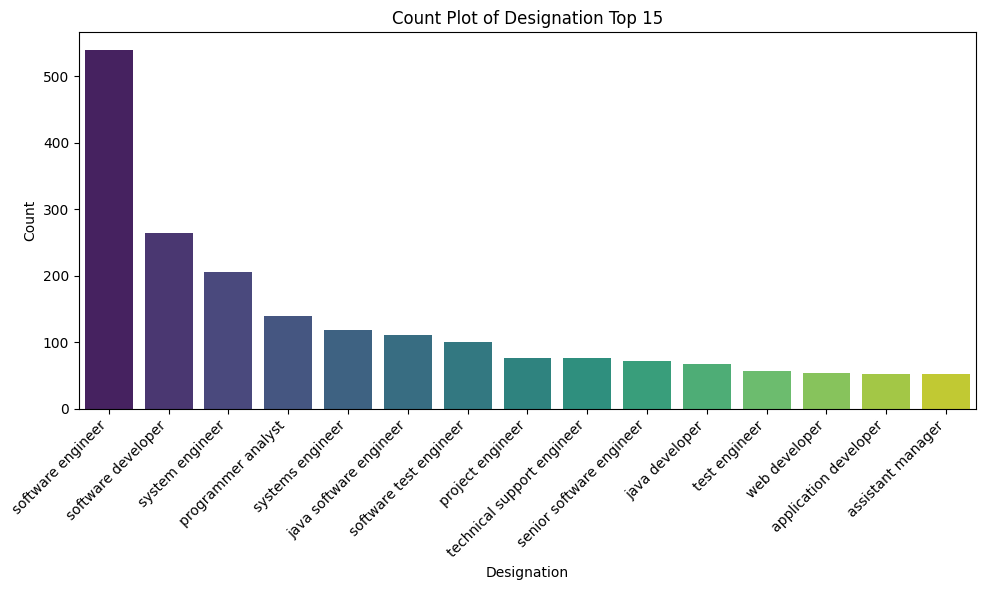

Value counts for JobCity:
JobCity
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: count, Length: 339, dtype: int64


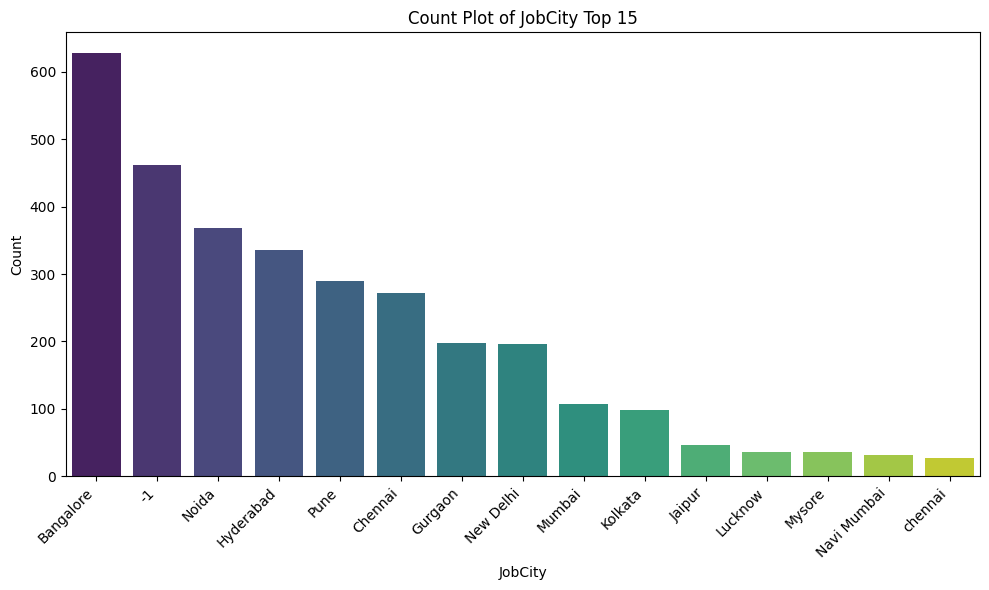

Value counts for Gender:
Gender
Male      3041
Female     957
Name: count, dtype: int64


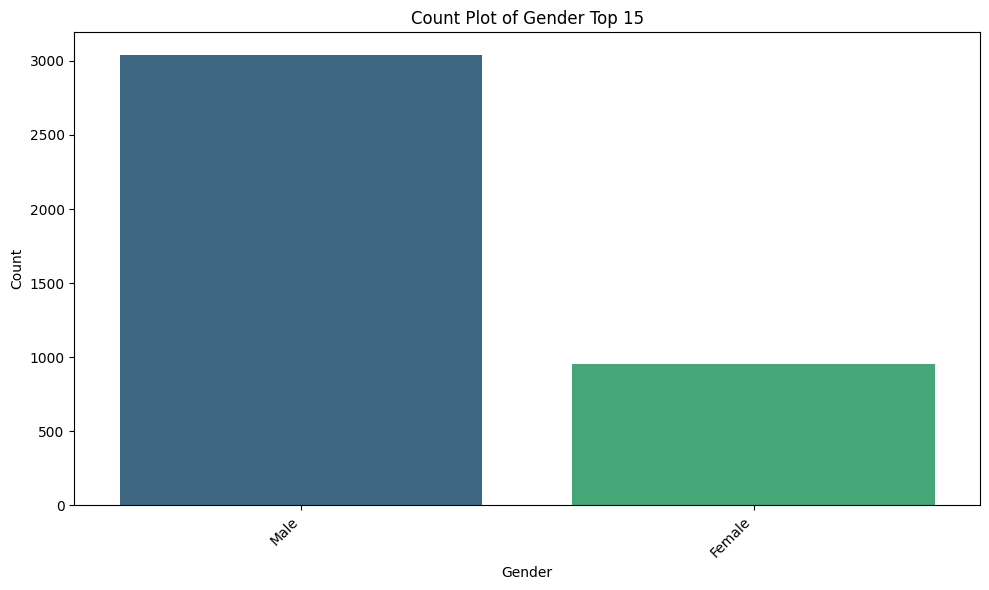

Value counts for 12board:
12board
cbse                                1400
state board                         1254
0                                    359
icse                                 129
up board                              87
                                    ... 
jawahar higher secondary school        1
nagpur board                           1
bsemp                                  1
board of higher secondary orissa       1
boardofintermediate                    1
Name: count, Length: 340, dtype: int64


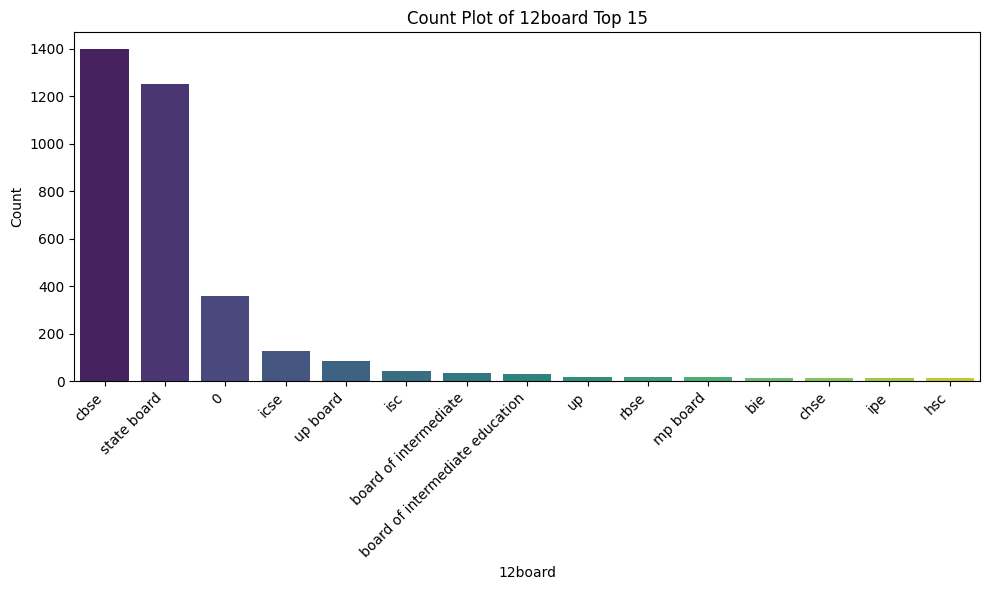

Value counts for Degree:
Degree
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64


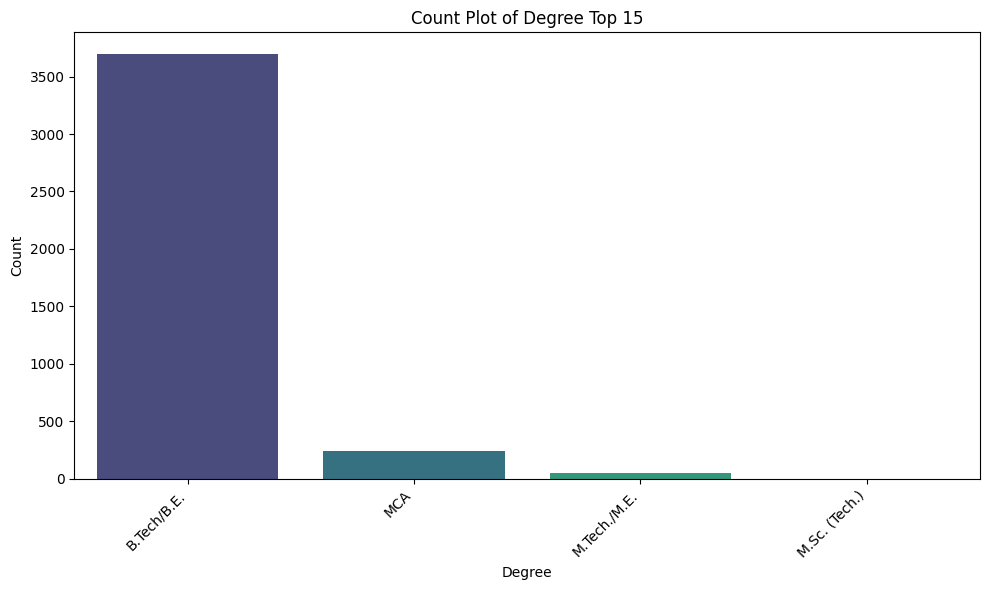

Value counts for Specialization:
Specialization
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrument

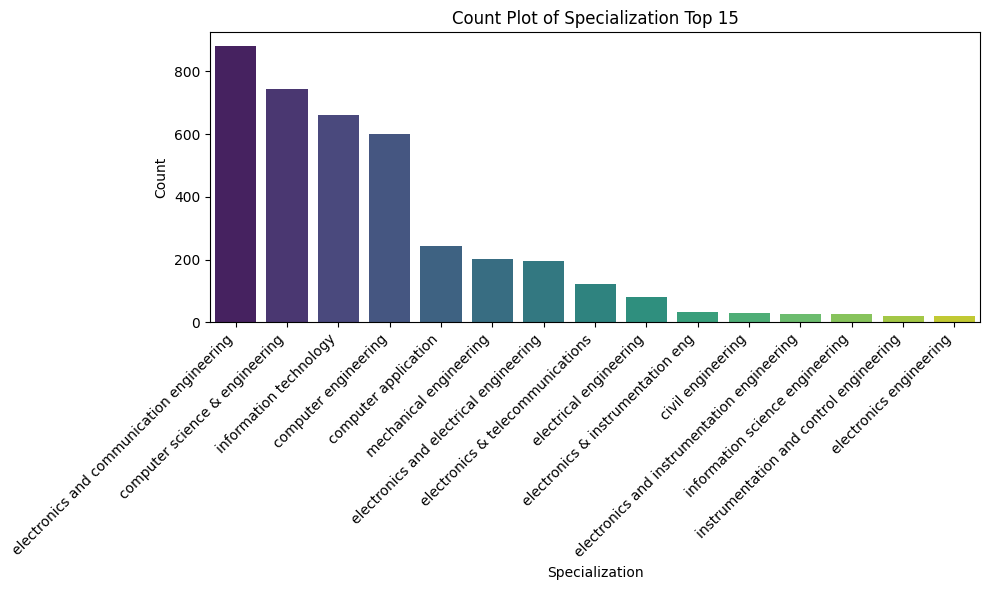

Value counts for CollegeState:
CollegeState
Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: count, dtype: int64


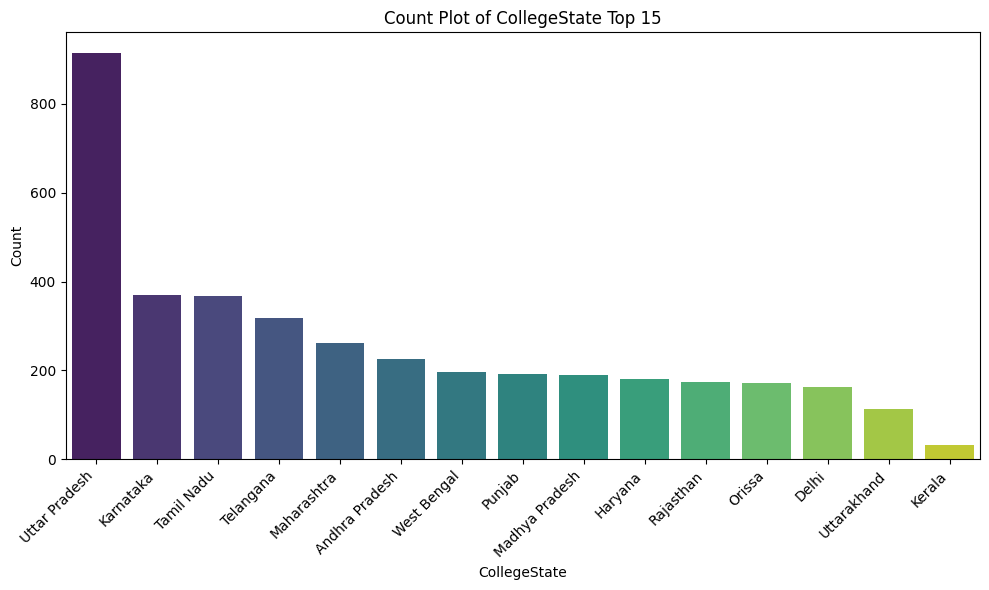

In [36]:
def categorical_univariate_analysis(data, column_name):
    # Calculate value counts
    value_counts = data[column_name].value_counts()
    
    # Print value counts
    print(f"Value counts for {column_name}:")
    print(value_counts)
    
    # Plot a countplot for the column
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column_name[:15], order=value_counts.index[:15], palette='viridis')
    plt.title(f'Count Plot of {column_name} Top 15')
    plt.xticks(rotation=45, ha='right')  
    plt.ylabel('Count')
    plt.xlabel(column_name)
    plt.tight_layout()
    plt.show()

categorical_columns = ['Designation', 'JobCity', 'Gender', '12board',
                       'Degree', 'Specialization', 'CollegeState']

for col in categorical_columns:
    categorical_univariate_analysis(df, col)


## Overall Analysis of Dataset with respect to Salary

In [37]:
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,2012-06-01,present,senior quality engineer,Bangalore,Female,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,2013-09-01,present,assistant manager,Indore,Male,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,2014-06-01,present,systems engineer,Chennai,Female,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,2011-07-01,present,senior software engineer,Gurgaon,Male,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,2014-03-01,3/1/15 0:00,get,Manesar,Male,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000.0,2011-10-01,10/1/12 0:00,software engineer,New Delhi,Male,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,2013-07-01,7/1/13 0:00,technical writer,Hyderabad,Female,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,2013-07-01,present,associate software engineer,Bangalore,Male,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,2014-07-01,1/1/15 0:00,software developer,Asifabadbanglore,Female,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [38]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

### Salary vs Designation (Top 15)

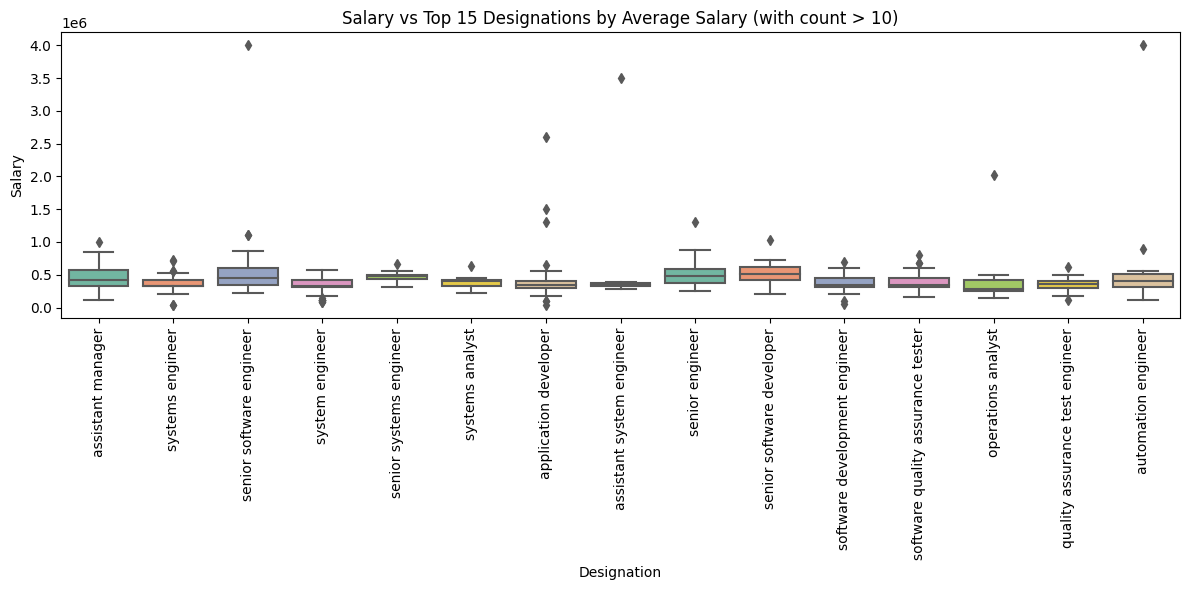

In [52]:
designation_counts = df['Designation'].value_counts()
valid_designations = designation_counts[designation_counts > 10].index

top_15_salary_designations = df[df['Designation'].isin(valid_designations)].groupby('Designation')['Salary'].mean().sort_values(ascending=False).index[:15]
df_top_15_salary = df[df['Designation'].isin(top_15_salary_designations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Designation', y='Salary', data=df_top_15_salary, palette='Set2')
plt.title('Salary vs Top 15 Designations by Average Salary (with count > 10)')
plt.xticks(rotation=90)
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()


**Observation:** The boxplot shows that **Assistant Manager and Senior Software Engineer** have **higher median salaries** among the top 15 designations with more than 10 employees. **Application Developer** exhibits a wide range of salaries, including the **highest outliers**. Other roles like System Engineer and Operations Analyst have more stable salary distributions, but with lower overall salaries compared to higher-paying role

### Salary vs JobCity (Top 15)

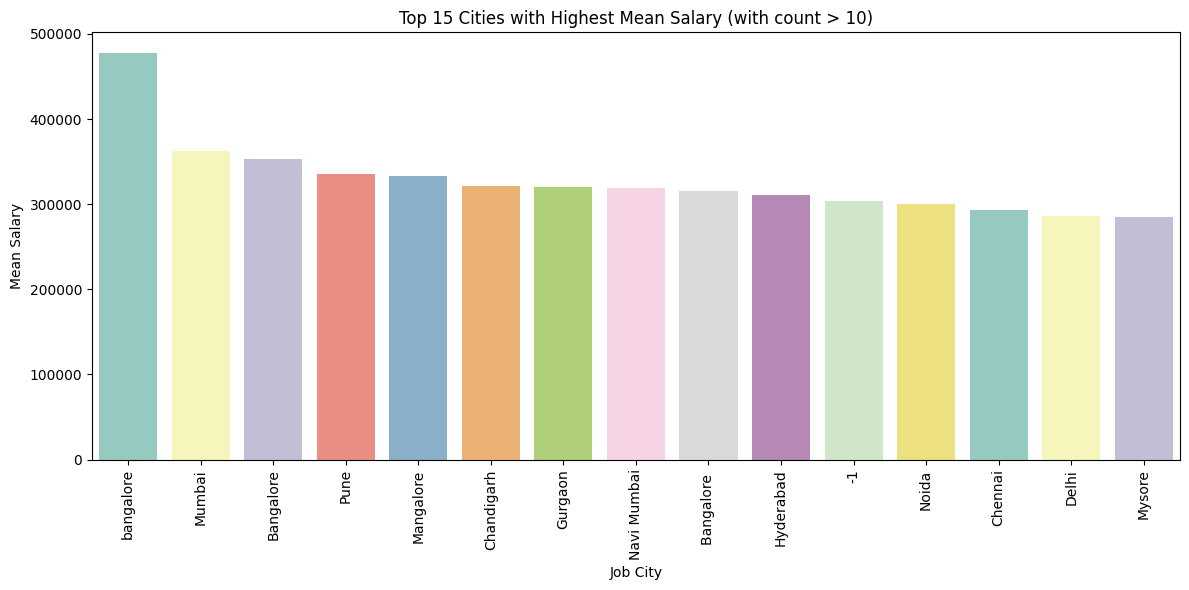

In [53]:
city_counts = df['JobCity'].value_counts()
valid_cities = city_counts[city_counts > 10].index

top_15_cities = df[df['JobCity'].isin(valid_cities)].groupby('JobCity')['Salary'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_cities.index, y=top_15_cities.values, palette='Set3')
plt.title('Top 15 Cities with Highest Mean Salary (with count > 10)')
plt.xticks(rotation=90)
plt.xlabel('Job City')
plt.ylabel('Mean Salary')
plt.tight_layout()
plt.show()


**Observation :** The bar plot shows that **Bangalore and Mumbai have the highest mean salaries** among cities with more than 10 employees, both exceeding ₹400,000. Other cities like Pune, Mangalore, and Chandigarh follow closely behind with slightly lower mean salaries. Overall, metropolitan areas such as Bangalore and Mumbai dominate in offering higher salary packages compared to smaller cities.

### Gender vs Salary

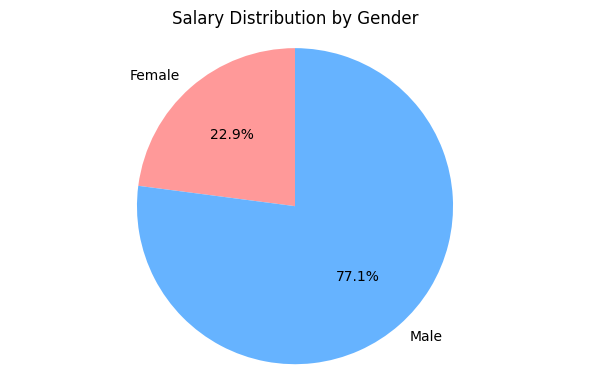

In [45]:
gender_salary_distribution = df.groupby('Gender')['Salary'].sum()

plt.figure(figsize=(6, 4))
plt.pie(gender_salary_distribution, labels=gender_salary_distribution.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Salary Distribution by Gender')
plt.axis('equal') 
plt.tight_layout()
plt.show()


**Observation:** The pie chart shows that 77.1% of the total salary is earned by male candidates, while female candidates account for 22.9% of the total salary. This significant difference suggests a potential **gender disparity** in salary distribution within the dataset, with **males earning a larger** proportion of the total income.

### Degree vs Salary

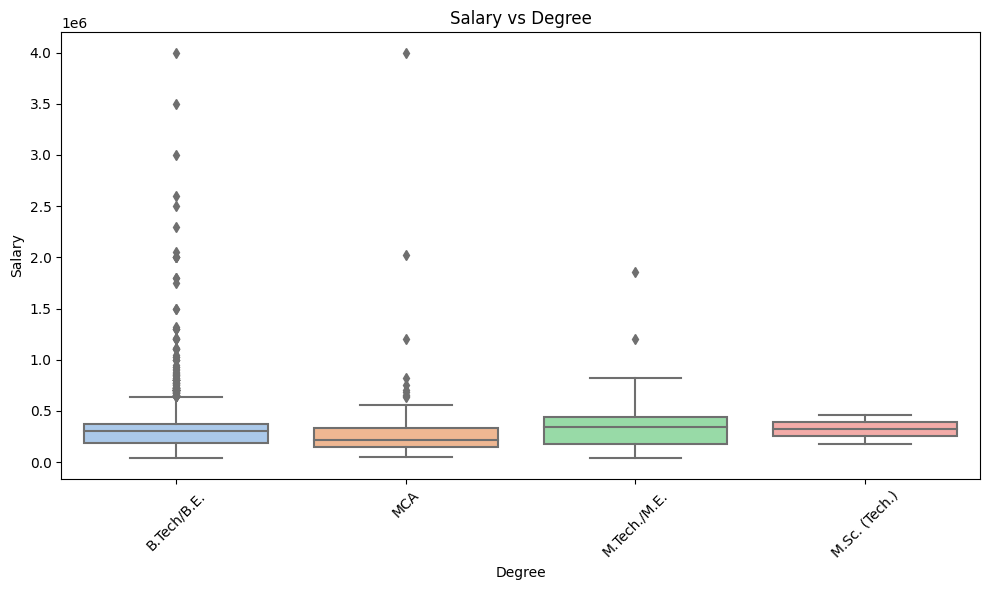

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Degree', y='Salary', data=df, palette='pastel')
plt.title('Salary vs Degree')
plt.xticks(rotation=45)
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

**Observation:** The boxplot shows that **B.Tech/B.E.** graduates have the **highest salary** range with many high-salary outliers. MCA and M.Tech/M.E. degrees have lower median salaries, with **M.Tech/M.E. offering some higher outliers.** M.Sc. (Tech.) has the lowest salary range with little variability.

### Specialisation vs Salary

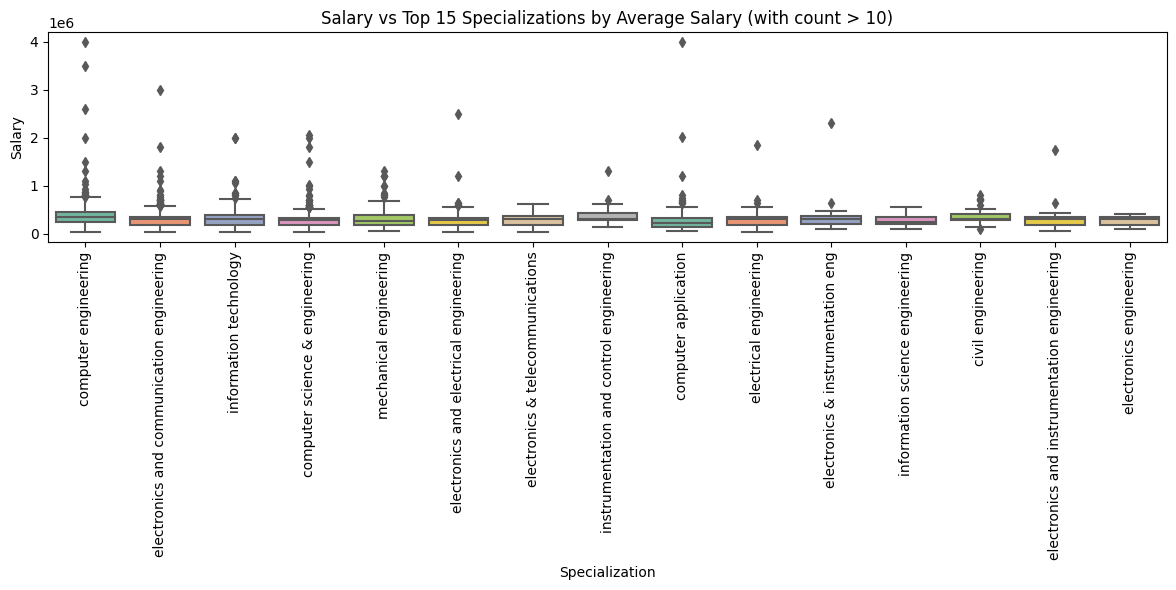

In [54]:
specialization_counts = df['Specialization'].value_counts()
valid_specializations = specialization_counts[specialization_counts > 10].index

top_15_spec = df[df['Specialization'].isin(valid_specializations)].groupby('Specialization')['Salary'].mean().sort_values(ascending=False).index[:15]
df_top_15_spec = df[df['Specialization'].isin(top_15_spec)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Specialization', y='Salary', data=df_top_15_spec, palette='Set2')
plt.title('Salary vs Top 15 Specializations by Average Salary (with count > 10)')
plt.xticks(rotation=90)
plt.xlabel('Specialization')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

**Observation:** The boxplot shows that **Computer Engineering, Computer Science & Engineering, and Information Technology** are among the top specializations with the **highest salary ranges** and several high-salary outliers. Specializations like **Mechanical Engineering and Electronics and Electrical Engineering** exhibit **lower salary** ranges, though they still have some variability. In general, computer-related specializations tend to offer better salary prospects compared to other engineering disciplines.

### CollegeState vs Salary

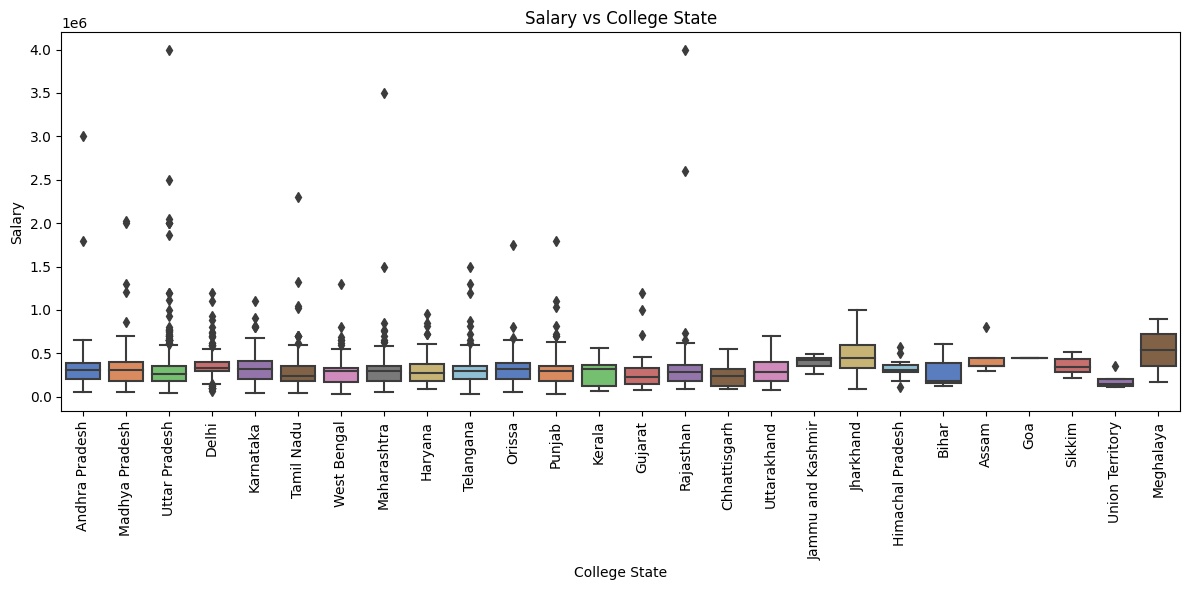

In [55]:
# Boxplot for Salary vs CollegeState
plt.figure(figsize=(12, 6))
sns.boxplot(x='CollegeState', y='Salary', data=df, palette='muted')
plt.title('Salary vs College State')
plt.xticks(rotation=90)
plt.xlabel('College State')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()


**Observation:** The boxplot shows a wide range of salaries across different college states, with states like **Delhi, Karnataka, and Maharashtra exhibiting higher salary ranges** and several outliers. States such as Meghalaya and Rajasthan show more variability in salary, including high outliers, while states like **Assam, Bihar, and Himachal Pradesh have lower overall salary ranges**. College location appears to play a role in salary prospects, with certain states offering better salary outcomes.

## Research Question : 
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware
Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”
Test this claim with the data given to you.
- Is there a relationship between gender and specialization? (i.e. Does the preference of
Specialisation depend on the Gender?)

In [69]:
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,2012-06-01,present,senior quality engineer,Bangalore,Female,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,2013-09-01,present,assistant manager,Indore,Male,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,2014-06-01,present,systems engineer,Chennai,Female,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,2011-07-01,present,senior software engineer,Gurgaon,Male,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,2014-03-01,3/1/15 0:00,get,Manesar,Male,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000.0,2011-10-01,10/1/12 0:00,software engineer,New Delhi,Male,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,2013-07-01,7/1/13 0:00,technical writer,Hyderabad,Female,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,2013-07-01,present,associate software engineer,Bangalore,Male,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,2014-07-01,1/1/15 0:00,software developer,Asifabadbanglore,Female,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


Mean Salary: 332943.26241134753
Median Salary: 315000.0
count        141.000000
mean      332943.262411
std       136456.522278
min        85000.000000
25%       265000.000000
50%       315000.000000
75%       370000.000000
max      1000000.000000
Name: Salary, dtype: float64


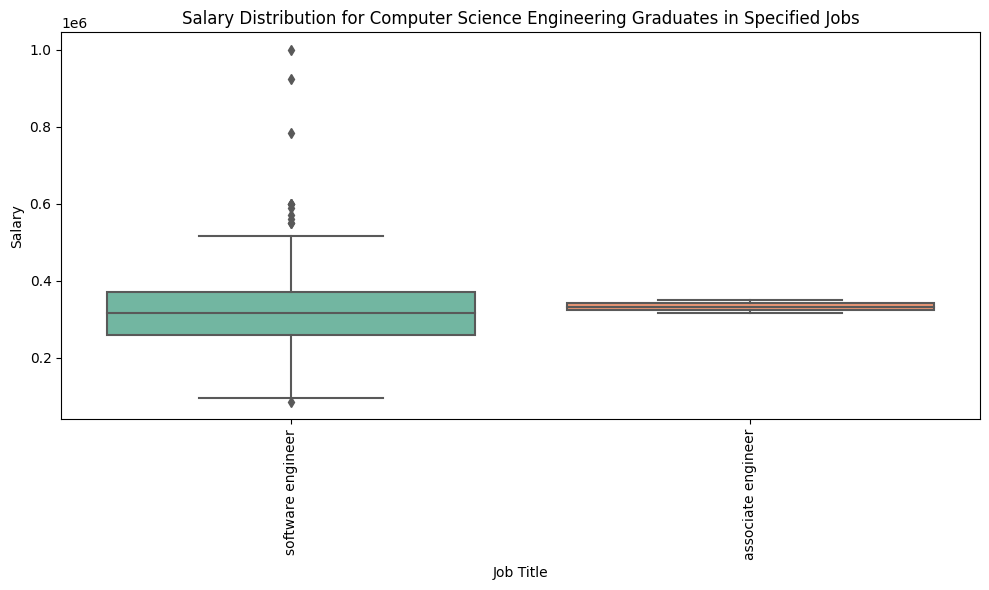

In [70]:
cs_graduates = df[df['Specialization'] == 'computer science & engineering']
job_titles = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']
cs_graduates_jobs = cs_graduates[cs_graduates['Designation'].str.lower().isin(job_titles)]

mean_salary = cs_graduates_jobs['Salary'].mean()
median_salary = cs_graduates_jobs['Salary'].median()
salary_stats = cs_graduates_jobs['Salary'].describe()

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(salary_stats)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Designation', y='Salary', data=cs_graduates_jobs, palette='Set2')
plt.title('Salary Distribution for Computer Science Engineering Graduates in Specified Jobs')
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()


**Observation:** The analysis shows that the mean salary for Computer Science Engineering graduates working as Software Engineers or Associate Engineers is ₹332,943, with a median salary of ₹315,000. This is slightly above the claimed range of ₹2.5-3 lakhs. Software Engineers exhibit more salary variability, with some outliers reaching up to ₹1 million, while Associate Engineers have tightly clustered salaries around ₹315,000. Overall, **the claim is largely accurate, but some roles offer higher earning potential beyond ₹3 lakhs.**

Chi-Square Test Statistic: 104.46891913608455
P-value: 1.2453868176976918e-06


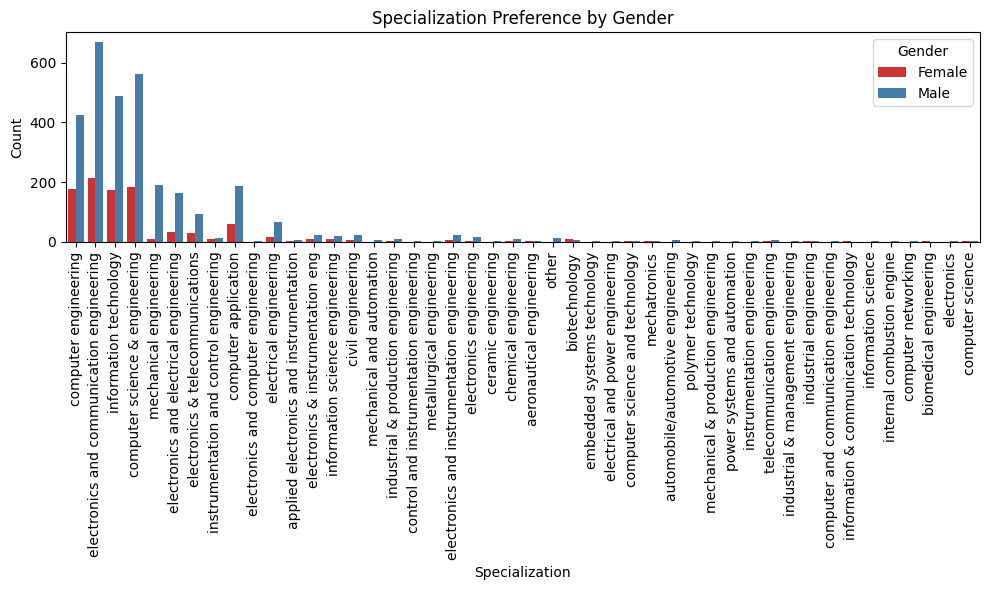

In [71]:
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

plt.figure(figsize=(10, 6))
sns.countplot(x='Specialization', hue='Gender', data=df, palette='Set1')
plt.title('Specialization Preference by Gender')
plt.xticks(rotation=90)
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Observation:** The Chi-Square test result shows a test statistic of 104.47 and a p-value of 1.24e-06, indicating a **significant relationship** between gender and specialization preference. The count plot shows that **males dominate in specializations such as Computer Engineering, Electronics and Communication Engineering, and Mechanical Engineering**, while females are fewer in number but are more **proportionately represented in specializations like Information Technology and Computer Science Engineering.** This suggests that specialization preferences are ***influenced by gender.***